In [143]:
import cv2
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import math

Importing all the required libraries and packages

In [144]:
validationDirect,trainDirect=[p for p in pathlib.Path("C:\\Users\\Trivikram\\Machine_Learning\\Data\\Handwritten").iterdir()]
trainFiles=[files for files in trainDirect.iterdir()]
validationFiles=[files for files in validationDirect.iterdir()]

Accessing the dataset of both training and validation

In [145]:
train_Data=pd.DataFrame()
for Folders in trainFiles:
    ProductNo=int(str(Folders)[-1])
    for files in Folders.iterdir():
        img=cv2.imread(str(files),0)
        Pixels=img.ravel()
        Pixels=np.append(Pixels,ProductNo)
        train_Data=train_Data.append(pd.Series(Pixels),ignore_index=True)
train_Data=train_Data.rename(columns={784: "Label"})
validation_Data=pd.DataFrame()
for Folders in validationFiles:
    ProductNo=int(str(Folders)[-1])
    for files in Folders.iterdir():
        img=cv2.imread(str(files),0)
        Pixels=img.ravel()
        Pixels=np.append(Pixels,ProductNo)
        validation_Data=validation_Data.append(pd.Series(Pixels),ignore_index=True)
validation_Data=validation_Data.rename(columns={784: "Label"})

Converting the images into pixels of Red,Green and Blue and storing those Pixels in a list which is then appended to the DataFrame for both training and validation files

In [146]:
train_Data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
5,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
6,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
7,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
8,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
9,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0


In [147]:
validation_Data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
5,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
6,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
7,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
8,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
9,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0


In [148]:
Columns=train_Data.columns
scaler=StandardScaler()
X=train_Data[[col for col in Columns if col!='Label']]
X_train=pd.DataFrame(data=scaler.fit_transform(X),columns=X.columns)
X_validation=pd.DataFrame(data=scaler.transform(validation_Data[X.columns]),columns=X.columns)
y_train=train_Data['Label']
y_validation=validation_Data['Label']

Scaling down all the pixel values using Standard Scaler to decrease computing power and hence reduce time latency for the algorithms to be tested

In [218]:
AlgorithmsList=[]
AccuracyList=[]

Declaring two lists for names of algorithms in use and their accuracy achieved.

Using our first algorithm Gaussian Naive Bayes which assumes that all of the attributes are independent of each other and all of them follow the Normal Distribution.
The accurracy obtained is 63 percent as shown when tested on our validation dataset

In [150]:
decreaseList=[]
for i in range(0,21):
    decreaseList.append(round(i*0.05,2))
print(decreaseList)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


A decrease List is made to be further used

In [151]:
param_grid = {'min_samples_split': range(2,20),'min_impurity_decrease':decreaseList,'criterion':['entropy','gini']}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid,cv = 3,verbose=10)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 756 candidates, totalling 2268 fits
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2, score=0.559, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2, score=0.738, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=2, score=0.758, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3, score=0.559, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3, score=0.732, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=4, score=0.586, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=4, score=0.725, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=4, score=0.738, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=5 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=5, score=0.599, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=5 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=5, score=0.765, total=   0.0s
[CV] criterion=entropy, min_impurity_dec

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=6, score=0.732, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=6, score=0.772, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=7 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=7, score=0.579, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=7 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=7, score=0.725, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=7 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=7, score=0.785, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, min_samples_split=8 
[CV]  criterion=entropy, min_impurity_decrease=0.0, min_samples_split=8, score=0.592, total=   0.0s
[CV] criterion=entropy, min_impurity_dec

[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=3, score=0.382, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.1, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=3, score=0.651, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.1, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=3, score=0.698, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.1, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=4, score=0.382, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.1, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=4, score=0.651, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.1, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=4, score=0.698, total=   0.0s
[CV] criterion=entropy, min_impurity_dec

[CV]  criterion=entropy, min_impurity_decrease=0.1, min_samples_split=19, score=0.698, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.15, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.15, min_samples_split=2, score=0.342, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.15, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.15, min_samples_split=2, score=0.497, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.15, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.15, min_samples_split=2, score=0.497, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.15, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=0.15, min_samples_split=3, score=0.342, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.15, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=0.15, min_samples_split=3, score=0.497, total=   0.0s
[CV] criterion=entropy, min_i

[CV] criterion=entropy, min_impurity_decrease=0.15, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.15, min_samples_split=19, score=0.497, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.15, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.15, min_samples_split=19, score=0.497, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=2, score=0.250, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samp

[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=18, score=0.250, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=19, score=0.250, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.2, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.2, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=entropy, min_i

[CV]  criterion=entropy, min_impurity_decrease=0.25, min_samples_split=17, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.25, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=0.25, min_samples_split=18, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.25, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=0.25, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.25, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=0.25, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.25, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.25, min_samples_split=19, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.25, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.25, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=ent

[CV]  criterion=entropy, min_impurity_decrease=0.3, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.3, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=0.3, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.3, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.3, min_samples_split=19, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.3, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.3, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.3, min_samples_split=19 
[CV]  criterion=entropy, min_impurity_decrease=0.3, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.35, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=0.35, min_samples_split=2, score=0.329, total=   0.0s
[CV] criterion=entropy, min_i

[CV] criterion=entropy, min_impurity_decrease=0.35, min_samples_split=16 
[CV]  criterion=entropy, min_impurity_decrease=0.35, min_samples_split=16, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.35, min_samples_split=17 
[CV]  criterion=entropy, min_impurity_decrease=0.35, min_samples_split=17, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.35, min_samples_split=17 
[CV]  criterion=entropy, min_impurity_decrease=0.35, min_samples_split=17, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.35, min_samples_split=17 
[CV]  criterion=entropy, min_impurity_decrease=0.35, min_samples_split=17, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.35, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease=0.35, min_samples_split=18, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.35, min_samples_split=18 
[CV]  criterion=entropy, min_impurity_decrease

[CV] criterion=entropy, min_impurity_decrease=0.4, min_samples_split=15 
[CV]  criterion=entropy, min_impurity_decrease=0.4, min_samples_split=15, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.4, min_samples_split=15 
[CV]  criterion=entropy, min_impurity_decrease=0.4, min_samples_split=15, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.4, min_samples_split=16 
[CV]  criterion=entropy, min_impurity_decrease=0.4, min_samples_split=16, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.4, min_samples_split=16 
[CV]  criterion=entropy, min_impurity_decrease=0.4, min_samples_split=16, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.4, min_samples_split=16 
[CV]  criterion=entropy, min_impurity_decrease=0.4, min_samples_split=16, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.4, min_samples_split=17 
[CV]  criterion=entropy, min_impurity_decrease=0.4, min_s

[CV]  criterion=entropy, min_impurity_decrease=0.45, min_samples_split=13, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.45, min_samples_split=13 
[CV]  criterion=entropy, min_impurity_decrease=0.45, min_samples_split=13, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.45, min_samples_split=14 
[CV]  criterion=entropy, min_impurity_decrease=0.45, min_samples_split=14, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.45, min_samples_split=14 
[CV]  criterion=entropy, min_impurity_decrease=0.45, min_samples_split=14, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.45, min_samples_split=14 
[CV]  criterion=entropy, min_impurity_decrease=0.45, min_samples_split=14, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.45, min_samples_split=15 
[CV]  criterion=entropy, min_impurity_decrease=0.45, min_samples_split=15, score=0.329, total=   0.0s
[CV] criterion=ent

[CV] criterion=entropy, min_impurity_decrease=0.55, min_samples_split=11 
[CV]  criterion=entropy, min_impurity_decrease=0.55, min_samples_split=11, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.55, min_samples_split=11 
[CV]  criterion=entropy, min_impurity_decrease=0.55, min_samples_split=11, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.55, min_samples_split=11 
[CV]  criterion=entropy, min_impurity_decrease=0.55, min_samples_split=11, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.55, min_samples_split=12 
[CV]  criterion=entropy, min_impurity_decrease=0.55, min_samples_split=12, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.55, min_samples_split=12 
[CV]  criterion=entropy, min_impurity_decrease=0.55, min_samples_split=12, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.55, min_samples_split=12 
[CV]  criterion=entropy, min_impurity_decrease

[CV]  criterion=entropy, min_impurity_decrease=0.6, min_samples_split=9, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.6, min_samples_split=9 
[CV]  criterion=entropy, min_impurity_decrease=0.6, min_samples_split=9, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.6, min_samples_split=9 
[CV]  criterion=entropy, min_impurity_decrease=0.6, min_samples_split=9, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.6, min_samples_split=10 
[CV]  criterion=entropy, min_impurity_decrease=0.6, min_samples_split=10, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.6, min_samples_split=10 
[CV]  criterion=entropy, min_impurity_decrease=0.6, min_samples_split=10, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.6, min_samples_split=10 
[CV]  criterion=entropy, min_impurity_decrease=0.6, min_samples_split=10, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impuri

[CV]  criterion=entropy, min_impurity_decrease=0.65, min_samples_split=7, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.65, min_samples_split=7 
[CV]  criterion=entropy, min_impurity_decrease=0.65, min_samples_split=7, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.65, min_samples_split=8 
[CV]  criterion=entropy, min_impurity_decrease=0.65, min_samples_split=8, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.65, min_samples_split=8 
[CV]  criterion=entropy, min_impurity_decrease=0.65, min_samples_split=8, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.65, min_samples_split=8 
[CV]  criterion=entropy, min_impurity_decrease=0.65, min_samples_split=8, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.65, min_samples_split=9 
[CV]  criterion=entropy, min_impurity_decrease=0.65, min_samples_split=9, score=0.329, total=   0.0s
[CV] criterion=entropy, min_i

[CV]  criterion=entropy, min_impurity_decrease=0.7, min_samples_split=6, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.7, min_samples_split=7 
[CV]  criterion=entropy, min_impurity_decrease=0.7, min_samples_split=7, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.7, min_samples_split=7 
[CV]  criterion=entropy, min_impurity_decrease=0.7, min_samples_split=7, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.7, min_samples_split=7 
[CV]  criterion=entropy, min_impurity_decrease=0.7, min_samples_split=7, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.7, min_samples_split=8 
[CV]  criterion=entropy, min_impurity_decrease=0.7, min_samples_split=8, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.7, min_samples_split=8 
[CV]  criterion=entropy, min_impurity_decrease=0.7, min_samples_split=8, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_dec

[CV]  criterion=entropy, min_impurity_decrease=0.75, min_samples_split=5, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.75, min_samples_split=5 
[CV]  criterion=entropy, min_impurity_decrease=0.75, min_samples_split=5, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.75, min_samples_split=5 
[CV]  criterion=entropy, min_impurity_decrease=0.75, min_samples_split=5, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.75, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.75, min_samples_split=6, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.75, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.75, min_samples_split=6, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.75, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.75, min_samples_split=6, score=0.336, total=   0.0s
[CV] criterion=entropy, min_i

[CV]  criterion=entropy, min_impurity_decrease=0.8, min_samples_split=5, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.8, min_samples_split=5 
[CV]  criterion=entropy, min_impurity_decrease=0.8, min_samples_split=5, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.8, min_samples_split=5 
[CV]  criterion=entropy, min_impurity_decrease=0.8, min_samples_split=5, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.8, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.8, min_samples_split=6, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.8, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.8, min_samples_split=6, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.8, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.8, min_samples_split=6, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_dec

[CV]  criterion=entropy, min_impurity_decrease=0.85, min_samples_split=3, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.85, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=0.85, min_samples_split=3, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.85, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.85, min_samples_split=4, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.85, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.85, min_samples_split=4, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.85, min_samples_split=4 
[CV]  criterion=entropy, min_impurity_decrease=0.85, min_samples_split=4, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.85, min_samples_split=5 
[CV]  criterion=entropy, min_impurity_decrease=0.85, min_samples_split=5, score=0.329, total=   0.0s
[CV] criterion=entropy, min_i

[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=5, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.9, min_samples_split=5 
[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=5, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.9, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=6, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.9, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=6, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.9, min_samples_split=6 
[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=6, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.9, min_samples_split=7 
[CV]  criterion=entropy, min_impurity_decrease=0.9, min_samples_split=7, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_dec

[CV]  criterion=entropy, min_impurity_decrease=0.95, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=2, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=2 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=3, score=0.329, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=1.0, min_samples_split=3 
[CV]  criterion=entropy, min_impurity_decrease=1.0, min_samples_split=3, score=0.336, total=   0.0s
[CV] criterion=entropy, min_impurity_d

[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=2, score=0.745, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_split=2 ..
[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=2, score=0.805, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=3, score=0.684, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=3, score=0.745, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_split=4 ..
[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=4, score=0.605, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_spl

[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=19, score=0.638, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=19, score=0.725, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.0, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.0, min_samples_split=19, score=0.765, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.05, min_samples_split=2 .
[CV]  criterion=gini, min_impurity_decrease=0.05, min_samples_split=2, score=0.309, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.05, min_samples_split=2 .
[CV]  criterion=gini, min_impurity_decrease=0.05, min_samples_split=2, score=0.497, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.05, min_samples_split=2 .
[CV]  criterion=gini, min_impurity_decrease=0.05, min_samples_split=2, score=0.497, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.05, min_samp

[CV]  criterion=gini, min_impurity_decrease=0.05, min_samples_split=19, score=0.497, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.05, min_samples_split=19 
[CV]  criterion=gini, min_impurity_decrease=0.05, min_samples_split=19, score=0.497, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples_split=2 ..
[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=2, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples_split=2 ..
[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples_split=2 ..
[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=3, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples

[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=19, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.1, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.1, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.15, min_samples_split=2 .
[CV]  criterion=gini, min_impurity_decrease=0.15, min_samples_split=2, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.15, min_samples_split=2 .
[CV]  criterion=gini, min_impurity_decrease=0.15, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.15, min_samp

[CV]  criterion=gini, min_impurity_decrease=0.15, min_samples_split=18, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.15, min_samples_split=18 
[CV]  criterion=gini, min_impurity_decrease=0.15, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.15, min_samples_split=18 
[CV]  criterion=gini, min_impurity_decrease=0.15, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.15, min_samples_split=19 
[CV]  criterion=gini, min_impurity_decrease=0.15, min_samples_split=19, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.15, min_samples_split=19 
[CV]  criterion=gini, min_impurity_decrease=0.15, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.15, min_samples_split=19 
[CV]  criterion=gini, min_impurity_decrease=0.15, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.2, min

[CV]  criterion=gini, min_impurity_decrease=0.2, min_samples_split=17, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.2, min_samples_split=17 .
[CV]  criterion=gini, min_impurity_decrease=0.2, min_samples_split=17, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.2, min_samples_split=18 .
[CV]  criterion=gini, min_impurity_decrease=0.2, min_samples_split=18, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.2, min_samples_split=18 .
[CV]  criterion=gini, min_impurity_decrease=0.2, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.2, min_samples_split=18 .
[CV]  criterion=gini, min_impurity_decrease=0.2, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.2, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.2, min_samples_split=19, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.2, min_sampl

[CV]  criterion=gini, min_impurity_decrease=0.25, min_samples_split=17, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.25, min_samples_split=17 
[CV]  criterion=gini, min_impurity_decrease=0.25, min_samples_split=17, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.25, min_samples_split=17 
[CV]  criterion=gini, min_impurity_decrease=0.25, min_samples_split=17, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.25, min_samples_split=18 
[CV]  criterion=gini, min_impurity_decrease=0.25, min_samples_split=18, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.25, min_samples_split=18 
[CV]  criterion=gini, min_impurity_decrease=0.25, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.25, min_samples_split=18 
[CV]  criterion=gini, min_impurity_decrease=0.25, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.25, mi

[CV]  criterion=gini, min_impurity_decrease=0.3, min_samples_split=16, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.3, min_samples_split=16 .
[CV]  criterion=gini, min_impurity_decrease=0.3, min_samples_split=16, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.3, min_samples_split=16 .
[CV]  criterion=gini, min_impurity_decrease=0.3, min_samples_split=16, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.3, min_samples_split=17 .
[CV]  criterion=gini, min_impurity_decrease=0.3, min_samples_split=17, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.3, min_samples_split=17 .
[CV]  criterion=gini, min_impurity_decrease=0.3, min_samples_split=17, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.3, min_samples_split=17 .
[CV]  criterion=gini, min_impurity_decrease=0.3, min_samples_split=17, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.3, min_sampl

[CV]  criterion=gini, min_impurity_decrease=0.35, min_samples_split=15, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.35, min_samples_split=15 
[CV]  criterion=gini, min_impurity_decrease=0.35, min_samples_split=15, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.35, min_samples_split=16 
[CV]  criterion=gini, min_impurity_decrease=0.35, min_samples_split=16, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.35, min_samples_split=16 
[CV]  criterion=gini, min_impurity_decrease=0.35, min_samples_split=16, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.35, min_samples_split=16 
[CV]  criterion=gini, min_impurity_decrease=0.35, min_samples_split=16, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.35, min_samples_split=17 
[CV]  criterion=gini, min_impurity_decrease=0.35, min_samples_split=17, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.35, mi

[CV] criterion=gini, min_impurity_decrease=0.4, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.4, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.45, min_samples_split=2 .
[CV]  criterion=gini, min_impurity_decrease=0.45, min_samples_split=2, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.45, min_samples_split=2 .
[CV]  criterion=gini, min_impurity_decrease=0.45, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.45, min_samples_split=2 .
[CV]  criterion=gini, min_impurity_decrease=0.45, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.45, min_samples_split=3 .
[CV]  criterion=gini, min_impurity_decrease=0.45, min_samples_split=3, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.45, min_samples_split=3 .
[CV]  criterion=gini, min_impurity_decrease=0.45, min_samples_split=3, score=0.336, 

[CV]  criterion=gini, min_impurity_decrease=0.45, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=2 ..
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=2, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=2 ..
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=2 ..
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=3, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=3, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_s

[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=18 .
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=19, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.5, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.5, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.55, min_samples_split=2 .
[CV]  criterion=gini, min_impurity_decrease=0.55, min_samples_split=2, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.55, min_samp

[CV] criterion=gini, min_impurity_decrease=0.55, min_samples_split=17 
[CV]  criterion=gini, min_impurity_decrease=0.55, min_samples_split=17, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.55, min_samples_split=18 
[CV]  criterion=gini, min_impurity_decrease=0.55, min_samples_split=18, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.55, min_samples_split=18 
[CV]  criterion=gini, min_impurity_decrease=0.55, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.55, min_samples_split=18 
[CV]  criterion=gini, min_impurity_decrease=0.55, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.55, min_samples_split=19 
[CV]  criterion=gini, min_impurity_decrease=0.55, min_samples_split=19, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.55, min_samples_split=19 
[CV]  criterion=gini, min_impurity_decrease=0.55, min_samples_split=19, score=0

[CV]  criterion=gini, min_impurity_decrease=0.65, min_samples_split=3, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.65, min_samples_split=3 .
[CV]  criterion=gini, min_impurity_decrease=0.65, min_samples_split=3, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.65, min_samples_split=3 .
[CV]  criterion=gini, min_impurity_decrease=0.65, min_samples_split=3, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.65, min_samples_split=4 .
[CV]  criterion=gini, min_impurity_decrease=0.65, min_samples_split=4, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.65, min_samples_split=4 .
[CV]  criterion=gini, min_impurity_decrease=0.65, min_samples_split=4, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.65, min_samples_split=4 .
[CV]  criterion=gini, min_impurity_decrease=0.65, min_samples_split=4, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.65, min_samp

[CV]  criterion=gini, min_impurity_decrease=0.7, min_samples_split=4, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.7, min_samples_split=5 ..
[CV]  criterion=gini, min_impurity_decrease=0.7, min_samples_split=5, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.7, min_samples_split=5 ..
[CV]  criterion=gini, min_impurity_decrease=0.7, min_samples_split=5, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.7, min_samples_split=5 ..
[CV]  criterion=gini, min_impurity_decrease=0.7, min_samples_split=5, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.7, min_samples_split=6 ..
[CV]  criterion=gini, min_impurity_decrease=0.7, min_samples_split=6, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.7, min_samples_split=6 ..
[CV]  criterion=gini, min_impurity_decrease=0.7, min_samples_split=6, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.7, min_samples_spl

[CV]  criterion=gini, min_impurity_decrease=0.75, min_samples_split=4, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.75, min_samples_split=4 .
[CV]  criterion=gini, min_impurity_decrease=0.75, min_samples_split=4, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.75, min_samples_split=5 .
[CV]  criterion=gini, min_impurity_decrease=0.75, min_samples_split=5, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.75, min_samples_split=5 .
[CV]  criterion=gini, min_impurity_decrease=0.75, min_samples_split=5, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.75, min_samples_split=5 .
[CV]  criterion=gini, min_impurity_decrease=0.75, min_samples_split=5, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.75, min_samples_split=6 .
[CV]  criterion=gini, min_impurity_decrease=0.75, min_samples_split=6, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.75, min_samp

[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=3, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=3, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=3, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=4 ..
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=4, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=4 ..
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=4, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_split=4 ..
[CV]  criterion=gini, min_impurity_decrease=0.8, min_samples_split=4, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.8, min_samples_spl

[CV]  criterion=gini, min_impurity_decrease=0.85, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.85, min_samples_split=3 .
[CV]  criterion=gini, min_impurity_decrease=0.85, min_samples_split=3, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.85, min_samples_split=3 .
[CV]  criterion=gini, min_impurity_decrease=0.85, min_samples_split=3, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.85, min_samples_split=3 .
[CV]  criterion=gini, min_impurity_decrease=0.85, min_samples_split=3, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.85, min_samples_split=4 .
[CV]  criterion=gini, min_impurity_decrease=0.85, min_samples_split=4, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.85, min_samples_split=4 .
[CV]  criterion=gini, min_impurity_decrease=0.85, min_samples_split=4, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.85, min_samp

[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=3, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=3, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_split=3 ..
[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=3, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_split=4 ..
[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=4, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_split=4 ..
[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=4, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_spl

[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.9, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=0.9, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.95, min_samples_split=2 .
[CV]  criterion=gini, min_impurity_decrease=0.95, min_samples_split=2, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.95, min_samples_split=2 .
[CV]  criterion=gini, min_impurity_decrease=0.95, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.95, min_samples_split=2 .
[CV]  criterion=gini, min_impurity_decrease=0.95, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.95, min_samples_split=3 .
[CV]  criterion=gini, min_impurity_decrease=0.95, min_samples_split=3, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.95, min_samp

[CV]  criterion=gini, min_impurity_decrease=0.95, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.95, min_samples_split=19 
[CV]  criterion=gini, min_impurity_decrease=0.95, min_samples_split=19, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.95, min_samples_split=19 
[CV]  criterion=gini, min_impurity_decrease=0.95, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.95, min_samples_split=19 
[CV]  criterion=gini, min_impurity_decrease=0.95, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=1.0, min_samples_split=2 ..
[CV]  criterion=gini, min_impurity_decrease=1.0, min_samples_split=2, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=1.0, min_samples_split=2 ..
[CV]  criterion=gini, min_impurity_decrease=1.0, min_samples_split=2, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=1.0, min_sam

[CV] criterion=gini, min_impurity_decrease=1.0, min_samples_split=18 .
[CV]  criterion=gini, min_impurity_decrease=1.0, min_samples_split=18, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=1.0, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=1.0, min_samples_split=19, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=1.0, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=1.0, min_samples_split=19, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=1.0, min_samples_split=19 .
[CV]  criterion=gini, min_impurity_decrease=1.0, min_samples_split=19, score=0.336, total=   0.0s


[Parallel(n_jobs=1)]: Done 2268 out of 2268 | elapsed:   28.9s finished
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.15, 0.2,
 

Decision Tree is an algorithm which uses the concept of entropy and impurity to split the data into parts until the conditions aren't satisfied.
During predictions all the conditions are checked like traversing through a binary tree and the output is hence predicted.
Running a grid search on the decision Tree algorithm and trying out all possible combinations of the hyperparameters min sample split ,min sample leaf and min impurity decrease to tune the algorithm and to prevent overfitting.
Stratified Cross validation is used to find the best fit of the model.

In [152]:
print("The accuracy obtained from Decision Tree is"+str(grid_search.score(X_validation,y_validation)))
print("The best estimator is "+str(grid_search.best_estimator_))

The accuracy obtained from Decision Tree is0.7352941176470589
The best estimator is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [219]:
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
dt.fit(X_train,y_train)
AlgorithmsList.append("DT")
AccuracyList.append(dt.score(X_validation,y_validation))

The accuracy obtained is around 80 percent and the best estimator is as above

Storing the best estimator in dt and the algorithm in algo list and also the accuracy in acc list

In [154]:
neight = KNeighborsClassifier()
length=int(math.sqrt(X_train.shape[0]))
parameters={'n_neighbors':([i for i in range(2,50)]), 'algorithm':['auto','ball_tree','kd_tree','brute'],
            'weights':['uniform','distance']}
clf = GridSearchCV(neight, parameters,verbose=10,cv=3)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=auto, n_neighbors=2, weights=uniform, score=0.770, total=   0.1s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV]  algorithm=auto, n_neighbors=2, weights=uniform, score=0.832, total=   0.1s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, score=0.785, total=   0.1s
[CV] algorithm=auto, n_neighbors=2, weights=distance .................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV]  algorithm=auto, n_neighbors=2, weights=distance, score=0.618, total=   0.1s
[CV] algorithm=auto, n_neighbors=2, weights=distance .................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


[CV]  algorithm=auto, n_neighbors=2, weights=distance, score=0.792, total=   0.1s
[CV] algorithm=auto, n_neighbors=2, weights=distance .................
[CV]  algorithm=auto, n_neighbors=2, weights=distance, score=0.691, total=   0.1s

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s



[CV] algorithm=auto, n_neighbors=3, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=3, weights=uniform, score=0.678, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=3, weights=uniform, score=0.758, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=3, weights=uniform, score=0.738, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, weights=distance .................
[CV]  algorithm=auto, n_neighbors=3, weights=distance, score=0.671, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, weights=distance .................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


[CV]  algorithm=auto, n_neighbors=3, weights=distance, score=0.758, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, weights=distance .................
[CV]  algorithm=auto, n_neighbors=3, weights=distance, score=0.725, total=   0.1s
[CV] algorithm=auto, n_neighbors=4, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=4, weights=uniform, score=0.658, total=   0.1s
[CV] algorithm=auto, n_neighbors=4, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=4, weights=uniform, score=0.785, total=   0.1s
[CV] algorithm=auto, n_neighbors=4, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=4, weights=uniform, score=0.752, total=   0.1s
[CV] algorithm=auto, n_neighbors=4, weights=distance .................
[CV]  algorithm=auto, n_neighbors=4, weights=distance, score=0.632, total=   0.1s
[CV] algorithm=auto, n_neighbors=4, weights=distance .................
[CV]  algorithm=auto, n_neighbors=4, weights=distance, score=0.765, total=   0.1s
[CV

[CV]  algorithm=auto, n_neighbors=12, weights=distance, score=0.604, total=   0.1s
[CV] algorithm=auto, n_neighbors=13, weights=uniform .................
[CV]  algorithm=auto, n_neighbors=13, weights=uniform, score=0.447, total=   0.1s
[CV] algorithm=auto, n_neighbors=13, weights=uniform .................
[CV]  algorithm=auto, n_neighbors=13, weights=uniform, score=0.550, total=   0.1s
[CV] algorithm=auto, n_neighbors=13, weights=uniform .................
[CV]  algorithm=auto, n_neighbors=13, weights=uniform, score=0.570, total=   0.1s
[CV] algorithm=auto, n_neighbors=13, weights=distance ................
[CV]  algorithm=auto, n_neighbors=13, weights=distance, score=0.434, total=   0.1s
[CV] algorithm=auto, n_neighbors=13, weights=distance ................
[CV]  algorithm=auto, n_neighbors=13, weights=distance, score=0.550, total=   0.1s
[CV] algorithm=auto, n_neighbors=13, weights=distance ................
[CV]  algorithm=auto, n_neighbors=13, weights=distance, score=0.570, total=   0

[CV]  algorithm=auto, n_neighbors=21, weights=distance, score=0.497, total=   0.1s
[CV] algorithm=auto, n_neighbors=22, weights=uniform .................
[CV]  algorithm=auto, n_neighbors=22, weights=uniform, score=0.375, total=   0.1s
[CV] algorithm=auto, n_neighbors=22, weights=uniform .................
[CV]  algorithm=auto, n_neighbors=22, weights=uniform, score=0.403, total=   0.1s
[CV] algorithm=auto, n_neighbors=22, weights=uniform .................
[CV]  algorithm=auto, n_neighbors=22, weights=uniform, score=0.483, total=   0.1s
[CV] algorithm=auto, n_neighbors=22, weights=distance ................
[CV]  algorithm=auto, n_neighbors=22, weights=distance, score=0.382, total=   0.1s
[CV] algorithm=auto, n_neighbors=22, weights=distance ................
[CV]  algorithm=auto, n_neighbors=22, weights=distance, score=0.416, total=   0.1s
[CV] algorithm=auto, n_neighbors=22, weights=distance ................
[CV]  algorithm=auto, n_neighbors=22, weights=distance, score=0.483, total=   0

[CV]  algorithm=auto, n_neighbors=31, weights=uniform, score=0.368, total=   0.1s
[CV] algorithm=auto, n_neighbors=31, weights=uniform .................
[CV]  algorithm=auto, n_neighbors=31, weights=uniform, score=0.389, total=   0.1s
[CV] algorithm=auto, n_neighbors=31, weights=uniform .................
[CV]  algorithm=auto, n_neighbors=31, weights=uniform, score=0.403, total=   0.1s
[CV] algorithm=auto, n_neighbors=31, weights=distance ................
[CV]  algorithm=auto, n_neighbors=31, weights=distance, score=0.375, total=   0.1s
[CV] algorithm=auto, n_neighbors=31, weights=distance ................
[CV]  algorithm=auto, n_neighbors=31, weights=distance, score=0.389, total=   0.1s
[CV] algorithm=auto, n_neighbors=31, weights=distance ................
[CV]  algorithm=auto, n_neighbors=31, weights=distance, score=0.409, total=   0.1s
[CV] algorithm=auto, n_neighbors=32, weights=uniform .................
[CV]  algorithm=auto, n_neighbors=32, weights=uniform, score=0.368, total=   0.

[CV]  algorithm=auto, n_neighbors=40, weights=uniform, score=0.383, total=   0.1s
[CV] algorithm=auto, n_neighbors=40, weights=distance ................
[CV]  algorithm=auto, n_neighbors=40, weights=distance, score=0.342, total=   0.1s
[CV] algorithm=auto, n_neighbors=40, weights=distance ................
[CV]  algorithm=auto, n_neighbors=40, weights=distance, score=0.369, total=   0.1s
[CV] algorithm=auto, n_neighbors=40, weights=distance ................
[CV]  algorithm=auto, n_neighbors=40, weights=distance, score=0.396, total=   0.1s
[CV] algorithm=auto, n_neighbors=41, weights=uniform .................
[CV]  algorithm=auto, n_neighbors=41, weights=uniform, score=0.342, total=   0.1s
[CV] algorithm=auto, n_neighbors=41, weights=uniform .................
[CV]  algorithm=auto, n_neighbors=41, weights=uniform, score=0.369, total=   0.1s
[CV] algorithm=auto, n_neighbors=41, weights=uniform .................
[CV]  algorithm=auto, n_neighbors=41, weights=uniform, score=0.389, total=   0.

[CV]  algorithm=ball_tree, n_neighbors=10, weights=uniform, score=0.617, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=10, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=10, weights=distance, score=0.487, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=10, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=10, weights=distance, score=0.597, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=10, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=10, weights=distance, score=0.624, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=11, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=11, weights=uniform, score=0.461, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=11, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=11, weights=uniform, score=0.570, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=11, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=11, weight

[CV]  algorithm=ball_tree, n_neighbors=19, weights=uniform, score=0.388, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=19, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=19, weights=uniform, score=0.456, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=19, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=19, weights=uniform, score=0.497, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=19, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=19, weights=distance, score=0.388, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=19, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=19, weights=distance, score=0.456, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=19, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=19, weights=distance, score=0.503, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=20, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=20, weight

[CV] algorithm=ball_tree, n_neighbors=28, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=28, weights=uniform, score=0.375, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=28, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=28, weights=uniform, score=0.389, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=28, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=28, weights=uniform, score=0.416, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=28, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=28, weights=distance, score=0.375, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=28, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=28, weights=distance, score=0.396, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=28, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=28, weights=distance, score=0.436, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=29, weights

[CV] algorithm=ball_tree, n_neighbors=36, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=36, weights=distance, score=0.396, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=37, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=37, weights=uniform, score=0.336, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=37, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=37, weights=uniform, score=0.369, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=37, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=37, weights=uniform, score=0.389, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=37, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=37, weights=distance, score=0.342, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=37, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=37, weights=distance, score=0.376, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=37, weights

[CV]  algorithm=ball_tree, n_neighbors=45, weights=distance, score=0.349, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=45, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=45, weights=distance, score=0.383, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=45, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=45, weights=distance, score=0.389, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=46, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=46, weights=uniform, score=0.329, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=46, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=46, weights=uniform, score=0.376, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=46, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=46, weights=uniform, score=0.376, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=46, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=46, weight

[CV]  algorithm=kd_tree, n_neighbors=6, weights=distance, score=0.738, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=6, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=6, weights=distance, score=0.671, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=7, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=7, weights=uniform, score=0.546, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=7, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=7, weights=uniform, score=0.651, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=7, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=7, weights=uniform, score=0.651, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=7, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=7, weights=distance, score=0.553, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=7, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=7, weights=distance, score=0.6

[CV]  algorithm=kd_tree, n_neighbors=15, weights=distance, score=0.421, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=15, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=15, weights=distance, score=0.490, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=15, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=15, weights=distance, score=0.530, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=16, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=16, weights=uniform, score=0.421, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=16, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=16, weights=uniform, score=0.483, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=16, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=16, weights=uniform, score=0.530, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=16, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=16, weights=distance, sc

[CV]  algorithm=kd_tree, n_neighbors=24, weights=distance, score=0.375, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=24, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=24, weights=distance, score=0.403, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=24, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=24, weights=distance, score=0.470, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=25, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=25, weights=uniform, score=0.368, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=25, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=25, weights=uniform, score=0.389, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=25, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=25, weights=uniform, score=0.450, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=25, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=25, weights=distance, sc

[CV]  algorithm=kd_tree, n_neighbors=33, weights=distance, score=0.368, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=33, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=33, weights=distance, score=0.383, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=33, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=33, weights=distance, score=0.403, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=34, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=34, weights=uniform, score=0.349, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=34, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=34, weights=uniform, score=0.356, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=34, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=34, weights=uniform, score=0.389, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=34, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=34, weights=distance, sc

[CV]  algorithm=kd_tree, n_neighbors=42, weights=uniform, score=0.383, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=42, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=42, weights=distance, score=0.342, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=42, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=42, weights=distance, score=0.376, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=42, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=42, weights=distance, score=0.389, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=43, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=43, weights=uniform, score=0.336, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=43, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=43, weights=uniform, score=0.369, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=43, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=43, weights=uniform, sco

[CV]  algorithm=brute, n_neighbors=4, weights=uniform, score=0.785, total=   0.0s
[CV] algorithm=brute, n_neighbors=4, weights=uniform .................
[CV]  algorithm=brute, n_neighbors=4, weights=uniform, score=0.752, total=   0.0s
[CV] algorithm=brute, n_neighbors=4, weights=distance ................
[CV]  algorithm=brute, n_neighbors=4, weights=distance, score=0.632, total=   0.0s
[CV] algorithm=brute, n_neighbors=4, weights=distance ................
[CV]  algorithm=brute, n_neighbors=4, weights=distance, score=0.765, total=   0.0s
[CV] algorithm=brute, n_neighbors=4, weights=distance ................
[CV]  algorithm=brute, n_neighbors=4, weights=distance, score=0.718, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, weights=uniform .................
[CV]  algorithm=brute, n_neighbors=5, weights=uniform, score=0.592, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, weights=uniform .................
[CV]  algorithm=brute, n_neighbors=5, weights=uniform, score=0.718, total=   0.

[CV]  algorithm=brute, n_neighbors=13, weights=uniform, score=0.550, total=   0.0s
[CV] algorithm=brute, n_neighbors=13, weights=uniform ................
[CV]  algorithm=brute, n_neighbors=13, weights=uniform, score=0.570, total=   0.0s
[CV] algorithm=brute, n_neighbors=13, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=13, weights=distance, score=0.434, total=   0.0s
[CV] algorithm=brute, n_neighbors=13, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=13, weights=distance, score=0.550, total=   0.0s
[CV] algorithm=brute, n_neighbors=13, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=13, weights=distance, score=0.570, total=   0.0s
[CV] algorithm=brute, n_neighbors=14, weights=uniform ................
[CV]  algorithm=brute, n_neighbors=14, weights=uniform, score=0.434, total=   0.0s
[CV] algorithm=brute, n_neighbors=14, weights=uniform ................
[CV]  algorithm=brute, n_neighbors=14, weights=uniform, score=0.490, tota

[CV]  algorithm=brute, n_neighbors=22, weights=distance, score=0.416, total=   0.0s
[CV] algorithm=brute, n_neighbors=22, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=22, weights=distance, score=0.483, total=   0.0s
[CV] algorithm=brute, n_neighbors=23, weights=uniform ................
[CV]  algorithm=brute, n_neighbors=23, weights=uniform, score=0.368, total=   0.0s
[CV] algorithm=brute, n_neighbors=23, weights=uniform ................
[CV]  algorithm=brute, n_neighbors=23, weights=uniform, score=0.403, total=   0.0s
[CV] algorithm=brute, n_neighbors=23, weights=uniform ................
[CV]  algorithm=brute, n_neighbors=23, weights=uniform, score=0.470, total=   0.0s
[CV] algorithm=brute, n_neighbors=23, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=23, weights=distance, score=0.375, total=   0.0s
[CV] algorithm=brute, n_neighbors=23, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=23, weights=distance, score=0.409, tot

[CV]  algorithm=brute, n_neighbors=32, weights=uniform, score=0.396, total=   0.0s
[CV] algorithm=brute, n_neighbors=32, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=32, weights=distance, score=0.375, total=   0.0s
[CV] algorithm=brute, n_neighbors=32, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=32, weights=distance, score=0.383, total=   0.0s
[CV] algorithm=brute, n_neighbors=32, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=32, weights=distance, score=0.396, total=   0.0s
[CV] algorithm=brute, n_neighbors=33, weights=uniform ................
[CV]  algorithm=brute, n_neighbors=33, weights=uniform, score=0.355, total=   0.0s
[CV] algorithm=brute, n_neighbors=33, weights=uniform ................
[CV]  algorithm=brute, n_neighbors=33, weights=uniform, score=0.376, total=   0.0s
[CV] algorithm=brute, n_neighbors=33, weights=uniform ................
[CV]  algorithm=brute, n_neighbors=33, weights=uniform, score=0.396, tota

[CV]  algorithm=brute, n_neighbors=42, weights=distance, score=0.376, total=   0.0s
[CV] algorithm=brute, n_neighbors=42, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=42, weights=distance, score=0.389, total=   0.0s
[CV] algorithm=brute, n_neighbors=43, weights=uniform ................
[CV]  algorithm=brute, n_neighbors=43, weights=uniform, score=0.336, total=   0.0s
[CV] algorithm=brute, n_neighbors=43, weights=uniform ................
[CV]  algorithm=brute, n_neighbors=43, weights=uniform, score=0.369, total=   0.0s
[CV] algorithm=brute, n_neighbors=43, weights=uniform ................
[CV]  algorithm=brute, n_neighbors=43, weights=uniform, score=0.389, total=   0.0s
[CV] algorithm=brute, n_neighbors=43, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=43, weights=distance, score=0.342, total=   0.0s
[CV] algorithm=brute, n_neighbors=43, weights=distance ...............
[CV]  algorithm=brute, n_neighbors=43, weights=distance, score=0.383, tot

[Parallel(n_jobs=1)]: Done 1152 out of 1152 | elapsed:  1.2min finished
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [155]:
print("The best estimator is "+str(clf.best_estimator_))
acc=clf.score(X_validation,y_validation)
print("The validation score obtained is "+str(acc))

The best estimator is KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
The validation score obtained is 0.803921568627451


In [220]:
knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
knn.fit(X_train,y_train)
AlgorithmsList.append("Knn")
AccuracyList.append(knn.score(X_validation,y_validation))

In [221]:
Bayes=GaussianNB()
Bayes.fit(X_train,y_train)
AlgorithmsList.append("NB")
accuracy=Bayes.score(X_validation,y_validation)
AccuracyList.append(accuracy)
print("The accuracy obtained from GaussianNaive Bayes is "+str(accuracy))

The accuracy obtained from GaussianNaive Bayes is 0.8284313725490197


In [158]:
param_grid = {'n_estimators': [10,30,50,70,85,100,120,130,140,150,200],'min_impurity_decrease':decreaseList,'criterion':['entropy','gini']}
rf =RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3,verbose=10)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 462 candidates, totalling 1386 fits
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=10 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=10, score=0.717, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=10 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=10, score=0.792, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=10 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=10, score=0.852, total=   0.0s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=30 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=30, score=0.789, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=30 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=30, score=0.812, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=30 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=30, score=0.893, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=50 ...


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=50, score=0.803, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=50 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=50, score=0.819, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=50 ...


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=50, score=0.893, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=70, score=0.822, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=70 ...


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s


[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=70, score=0.819, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=70, score=0.906, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=85, score=0.816, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=85, score=0.812, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=85, score=0.886, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=100 ..
[CV]  criterion=entropy, min_impurity_decrease=0.0, n_estimators=100, score=0.836, total=   0.3s
[CV] criterion=entropy, min_impurity_decrease=0.0, n_estimators=100 

[CV]  criterion=entropy, min_impurity_decrease=0.05, n_estimators=140, score=0.799, total=   0.3s
[CV] criterion=entropy, min_impurity_decrease=0.05, n_estimators=150 .
[CV]  criterion=entropy, min_impurity_decrease=0.05, n_estimators=150, score=0.724, total=   0.3s
[CV] criterion=entropy, min_impurity_decrease=0.05, n_estimators=150 .
[CV]  criterion=entropy, min_impurity_decrease=0.05, n_estimators=150, score=0.765, total=   0.3s
[CV] criterion=entropy, min_impurity_decrease=0.05, n_estimators=150 .
[CV]  criterion=entropy, min_impurity_decrease=0.05, n_estimators=150, score=0.799, total=   0.3s
[CV] criterion=entropy, min_impurity_decrease=0.05, n_estimators=200 .
[CV]  criterion=entropy, min_impurity_decrease=0.05, n_estimators=200, score=0.750, total=   0.4s
[CV] criterion=entropy, min_impurity_decrease=0.05, n_estimators=200 .
[CV]  criterion=entropy, min_impurity_decrease=0.05, n_estimators=200, score=0.752, total=   0.4s
[CV] criterion=entropy, min_impurity_decrease=0.05, n_est

[CV]  criterion=entropy, min_impurity_decrease=0.15, n_estimators=70, score=0.349, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.15, n_estimators=70 ..
[CV]  criterion=entropy, min_impurity_decrease=0.15, n_estimators=70, score=0.356, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.15, n_estimators=85 ..
[CV]  criterion=entropy, min_impurity_decrease=0.15, n_estimators=85, score=0.454, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.15, n_estimators=85 ..
[CV]  criterion=entropy, min_impurity_decrease=0.15, n_estimators=85, score=0.349, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.15, n_estimators=85 ..
[CV]  criterion=entropy, min_impurity_decrease=0.15, n_estimators=85, score=0.356, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.15, n_estimators=100 .
[CV]  criterion=entropy, min_impurity_decrease=0.15, n_estimators=100, score=0.461, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.15, n_estimato

[CV]  criterion=entropy, min_impurity_decrease=0.2, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.2, n_estimators=150 ..
[CV]  criterion=entropy, min_impurity_decrease=0.2, n_estimators=150, score=0.329, total=   0.3s
[CV] criterion=entropy, min_impurity_decrease=0.2, n_estimators=150 ..
[CV]  criterion=entropy, min_impurity_decrease=0.2, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.2, n_estimators=150 ..
[CV]  criterion=entropy, min_impurity_decrease=0.2, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.2, n_estimators=200 ..
[CV]  criterion=entropy, min_impurity_decrease=0.2, n_estimators=200, score=0.329, total=   0.3s
[CV] criterion=entropy, min_impurity_decrease=0.2, n_estimators=200 ..
[CV]  criterion=entropy, min_impurity_decrease=0.2, n_estimators=200, score=0.336, total=   0.3s
[CV] criterion=entropy, min_impurity_decrease=0.2, n_estimators

[CV]  criterion=entropy, min_impurity_decrease=0.3, n_estimators=70, score=0.329, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.3, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.3, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.3, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.3, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.3, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.3, n_estimators=85, score=0.329, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.3, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.3, n_estimators=85, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.3, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.3, n_estimators=85, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.3, n_estimators=100 .

[CV]  criterion=entropy, min_impurity_decrease=0.35, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.35, n_estimators=140 .
[CV]  criterion=entropy, min_impurity_decrease=0.35, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.35, n_estimators=150 .
[CV]  criterion=entropy, min_impurity_decrease=0.35, n_estimators=150, score=0.329, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.35, n_estimators=150 .
[CV]  criterion=entropy, min_impurity_decrease=0.35, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.35, n_estimators=150 .
[CV]  criterion=entropy, min_impurity_decrease=0.35, n_estimators=150, score=0.336, total=   0.3s
[CV] criterion=entropy, min_impurity_decrease=0.35, n_estimators=200 .
[CV]  criterion=entropy, min_impurity_decrease=0.35, n_estimators=200, score=0.329, total=   0.3s
[CV] criterion=entropy, min_impurity_decrease=0.35, n_est

[CV]  criterion=entropy, min_impurity_decrease=0.45, n_estimators=70, score=0.329, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.45, n_estimators=70 ..
[CV]  criterion=entropy, min_impurity_decrease=0.45, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.45, n_estimators=70 ..
[CV]  criterion=entropy, min_impurity_decrease=0.45, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.45, n_estimators=85 ..
[CV]  criterion=entropy, min_impurity_decrease=0.45, n_estimators=85, score=0.329, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.45, n_estimators=85 ..
[CV]  criterion=entropy, min_impurity_decrease=0.45, n_estimators=85, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.45, n_estimators=85 ..
[CV]  criterion=entropy, min_impurity_decrease=0.45, n_estimators=85, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.45, n_estimator

[CV]  criterion=entropy, min_impurity_decrease=0.5, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.5, n_estimators=140 ..
[CV]  criterion=entropy, min_impurity_decrease=0.5, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.5, n_estimators=150 ..
[CV]  criterion=entropy, min_impurity_decrease=0.5, n_estimators=150, score=0.329, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.5, n_estimators=150 ..
[CV]  criterion=entropy, min_impurity_decrease=0.5, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.5, n_estimators=150 ..
[CV]  criterion=entropy, min_impurity_decrease=0.5, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.5, n_estimators=200 ..
[CV]  criterion=entropy, min_impurity_decrease=0.5, n_estimators=200, score=0.329, total=   0.3s
[CV] criterion=entropy, min_impurity_decrease=0.5, n_estimators

[CV]  criterion=entropy, min_impurity_decrease=0.6, n_estimators=50, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.6, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.6, n_estimators=70, score=0.329, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.6, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.6, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.6, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.6, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.6, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.6, n_estimators=85, score=0.329, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.6, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.6, n_estimators=85, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.6, n_estimators=85 ..

[CV]  criterion=entropy, min_impurity_decrease=0.65, n_estimators=140, score=0.329, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.65, n_estimators=140 .
[CV]  criterion=entropy, min_impurity_decrease=0.65, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.65, n_estimators=140 .
[CV]  criterion=entropy, min_impurity_decrease=0.65, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.65, n_estimators=150 .
[CV]  criterion=entropy, min_impurity_decrease=0.65, n_estimators=150, score=0.329, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.65, n_estimators=150 .
[CV]  criterion=entropy, min_impurity_decrease=0.65, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.65, n_estimators=150 .
[CV]  criterion=entropy, min_impurity_decrease=0.65, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.65, n_est

[CV]  criterion=entropy, min_impurity_decrease=0.75, n_estimators=50, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.75, n_estimators=50 ..
[CV]  criterion=entropy, min_impurity_decrease=0.75, n_estimators=50, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.75, n_estimators=70 ..
[CV]  criterion=entropy, min_impurity_decrease=0.75, n_estimators=70, score=0.329, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.75, n_estimators=70 ..
[CV]  criterion=entropy, min_impurity_decrease=0.75, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.75, n_estimators=70 ..
[CV]  criterion=entropy, min_impurity_decrease=0.75, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.75, n_estimators=85 ..
[CV]  criterion=entropy, min_impurity_decrease=0.75, n_estimators=85, score=0.329, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.75, n_estimator

[CV]  criterion=entropy, min_impurity_decrease=0.8, n_estimators=140, score=0.329, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.8, n_estimators=140 ..
[CV]  criterion=entropy, min_impurity_decrease=0.8, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.8, n_estimators=140 ..
[CV]  criterion=entropy, min_impurity_decrease=0.8, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.8, n_estimators=150 ..
[CV]  criterion=entropy, min_impurity_decrease=0.8, n_estimators=150, score=0.329, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.8, n_estimators=150 ..
[CV]  criterion=entropy, min_impurity_decrease=0.8, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.8, n_estimators=150 ..
[CV]  criterion=entropy, min_impurity_decrease=0.8, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.8, n_estimators

[CV]  criterion=entropy, min_impurity_decrease=0.9, n_estimators=50, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.9, n_estimators=50 ...
[CV]  criterion=entropy, min_impurity_decrease=0.9, n_estimators=50, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.9, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.9, n_estimators=70, score=0.329, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.9, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.9, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.9, n_estimators=70 ...
[CV]  criterion=entropy, min_impurity_decrease=0.9, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.9, n_estimators=85 ...
[CV]  criterion=entropy, min_impurity_decrease=0.9, n_estimators=85, score=0.329, total=   0.1s
[CV] criterion=entropy, min_impurity_decrease=0.9, n_estimators=85 ..

[CV]  criterion=entropy, min_impurity_decrease=0.95, n_estimators=130, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.95, n_estimators=140 .
[CV]  criterion=entropy, min_impurity_decrease=0.95, n_estimators=140, score=0.329, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.95, n_estimators=140 .
[CV]  criterion=entropy, min_impurity_decrease=0.95, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.95, n_estimators=140 .
[CV]  criterion=entropy, min_impurity_decrease=0.95, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.95, n_estimators=150 .
[CV]  criterion=entropy, min_impurity_decrease=0.95, n_estimators=150, score=0.329, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.95, n_estimators=150 .
[CV]  criterion=entropy, min_impurity_decrease=0.95, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=entropy, min_impurity_decrease=0.95, n_est

[CV]  criterion=gini, min_impurity_decrease=0.0, n_estimators=50, score=0.776, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.0, n_estimators=50 ......
[CV]  criterion=gini, min_impurity_decrease=0.0, n_estimators=50, score=0.872, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.0, n_estimators=50 ......
[CV]  criterion=gini, min_impurity_decrease=0.0, n_estimators=50, score=0.879, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.0, n_estimators=70 ......
[CV]  criterion=gini, min_impurity_decrease=0.0, n_estimators=70, score=0.776, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.0, n_estimators=70 ......
[CV]  criterion=gini, min_impurity_decrease=0.0, n_estimators=70, score=0.852, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.0, n_estimators=70 ......
[CV]  criterion=gini, min_impurity_decrease=0.0, n_estimators=70, score=0.899, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.0, n_estimators=85 ......
[CV]  criterion=

[CV]  criterion=gini, min_impurity_decrease=0.05, n_estimators=130, score=0.396, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.05, n_estimators=140 ....
[CV]  criterion=gini, min_impurity_decrease=0.05, n_estimators=140, score=0.500, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.05, n_estimators=140 ....
[CV]  criterion=gini, min_impurity_decrease=0.05, n_estimators=140, score=0.362, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.05, n_estimators=140 ....
[CV]  criterion=gini, min_impurity_decrease=0.05, n_estimators=140, score=0.369, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.05, n_estimators=150 ....
[CV]  criterion=gini, min_impurity_decrease=0.05, n_estimators=150, score=0.500, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.05, n_estimators=150 ....
[CV]  criterion=gini, min_impurity_decrease=0.05, n_estimators=150, score=0.356, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.05, n_estimators=150 ....
[CV]

[CV]  criterion=gini, min_impurity_decrease=0.15, n_estimators=50, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.15, n_estimators=70 .....
[CV]  criterion=gini, min_impurity_decrease=0.15, n_estimators=70, score=0.329, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.15, n_estimators=70 .....
[CV]  criterion=gini, min_impurity_decrease=0.15, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.15, n_estimators=70 .....
[CV]  criterion=gini, min_impurity_decrease=0.15, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.15, n_estimators=85 .....
[CV]  criterion=gini, min_impurity_decrease=0.15, n_estimators=85, score=0.329, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.15, n_estimators=85 .....
[CV]  criterion=gini, min_impurity_decrease=0.15, n_estimators=85, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.15, n_estimators=85 .....
[CV]  crit

[CV]  criterion=gini, min_impurity_decrease=0.2, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.2, n_estimators=140 .....
[CV]  criterion=gini, min_impurity_decrease=0.2, n_estimators=140, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.2, n_estimators=150 .....
[CV]  criterion=gini, min_impurity_decrease=0.2, n_estimators=150, score=0.329, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.2, n_estimators=150 .....
[CV]  criterion=gini, min_impurity_decrease=0.2, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.2, n_estimators=150 .....
[CV]  criterion=gini, min_impurity_decrease=0.2, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.2, n_estimators=200 .....
[CV]  criterion=gini, min_impurity_decrease=0.2, n_estimators=200, score=0.329, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.2, n_estimators=200 .....
[CV]  crit

[CV]  criterion=gini, min_impurity_decrease=0.3, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.3, n_estimators=70 ......
[CV]  criterion=gini, min_impurity_decrease=0.3, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.3, n_estimators=85 ......
[CV]  criterion=gini, min_impurity_decrease=0.3, n_estimators=85, score=0.329, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.3, n_estimators=85 ......
[CV]  criterion=gini, min_impurity_decrease=0.3, n_estimators=85, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.3, n_estimators=85 ......
[CV]  criterion=gini, min_impurity_decrease=0.3, n_estimators=85, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.3, n_estimators=100 .....
[CV]  criterion=gini, min_impurity_decrease=0.3, n_estimators=100, score=0.329, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.3, n_estimators=100 .....
[CV]  criterion

[CV]  criterion=gini, min_impurity_decrease=0.35, n_estimators=150, score=0.329, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.35, n_estimators=150 ....
[CV]  criterion=gini, min_impurity_decrease=0.35, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.35, n_estimators=150 ....
[CV]  criterion=gini, min_impurity_decrease=0.35, n_estimators=150, score=0.336, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.35, n_estimators=200 ....
[CV]  criterion=gini, min_impurity_decrease=0.35, n_estimators=200, score=0.329, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.35, n_estimators=200 ....
[CV]  criterion=gini, min_impurity_decrease=0.35, n_estimators=200, score=0.336, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.35, n_estimators=200 ....
[CV]  criterion=gini, min_impurity_decrease=0.35, n_estimators=200, score=0.336, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.4, n_estimators=10 ......
[CV]

[CV]  criterion=gini, min_impurity_decrease=0.45, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.45, n_estimators=85 .....
[CV]  criterion=gini, min_impurity_decrease=0.45, n_estimators=85, score=0.329, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.45, n_estimators=85 .....
[CV]  criterion=gini, min_impurity_decrease=0.45, n_estimators=85, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.45, n_estimators=85 .....
[CV]  criterion=gini, min_impurity_decrease=0.45, n_estimators=85, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.45, n_estimators=100 ....
[CV]  criterion=gini, min_impurity_decrease=0.45, n_estimators=100, score=0.329, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.45, n_estimators=100 ....
[CV]  criterion=gini, min_impurity_decrease=0.45, n_estimators=100, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.45, n_estimators=100 ....
[CV]  cr

[CV]  criterion=gini, min_impurity_decrease=0.5, n_estimators=150, score=0.336, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.5, n_estimators=150 .....
[CV]  criterion=gini, min_impurity_decrease=0.5, n_estimators=150, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.5, n_estimators=200 .....
[CV]  criterion=gini, min_impurity_decrease=0.5, n_estimators=200, score=0.329, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.5, n_estimators=200 .....
[CV]  criterion=gini, min_impurity_decrease=0.5, n_estimators=200, score=0.336, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.5, n_estimators=200 .....
[CV]  criterion=gini, min_impurity_decrease=0.5, n_estimators=200, score=0.336, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.55, n_estimators=10 .....
[CV]  criterion=gini, min_impurity_decrease=0.55, n_estimators=10, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.55, n_estimators=10 .....
[CV]  crit

[CV]  criterion=gini, min_impurity_decrease=0.6, n_estimators=85, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.6, n_estimators=85 ......
[CV]  criterion=gini, min_impurity_decrease=0.6, n_estimators=85, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.6, n_estimators=100 .....
[CV]  criterion=gini, min_impurity_decrease=0.6, n_estimators=100, score=0.329, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.6, n_estimators=100 .....
[CV]  criterion=gini, min_impurity_decrease=0.6, n_estimators=100, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.6, n_estimators=100 .....
[CV]  criterion=gini, min_impurity_decrease=0.6, n_estimators=100, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.6, n_estimators=120 .....
[CV]  criterion=gini, min_impurity_decrease=0.6, n_estimators=120, score=0.329, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.6, n_estimators=120 .....
[CV]  criter

[CV]  criterion=gini, min_impurity_decrease=0.65, n_estimators=200, score=0.329, total=   0.5s
[CV] criterion=gini, min_impurity_decrease=0.65, n_estimators=200 ....
[CV]  criterion=gini, min_impurity_decrease=0.65, n_estimators=200, score=0.336, total=   0.5s
[CV] criterion=gini, min_impurity_decrease=0.65, n_estimators=200 ....
[CV]  criterion=gini, min_impurity_decrease=0.65, n_estimators=200, score=0.336, total=   0.5s
[CV] criterion=gini, min_impurity_decrease=0.7, n_estimators=10 ......
[CV]  criterion=gini, min_impurity_decrease=0.7, n_estimators=10, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.7, n_estimators=10 ......
[CV]  criterion=gini, min_impurity_decrease=0.7, n_estimators=10, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.7, n_estimators=10 ......
[CV]  criterion=gini, min_impurity_decrease=0.7, n_estimators=10, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.7, n_estimators=30 ......
[CV]  crit

[CV]  criterion=gini, min_impurity_decrease=0.75, n_estimators=100, score=0.329, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.75, n_estimators=100 ....
[CV]  criterion=gini, min_impurity_decrease=0.75, n_estimators=100, score=0.336, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.75, n_estimators=100 ....
[CV]  criterion=gini, min_impurity_decrease=0.75, n_estimators=100, score=0.336, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.75, n_estimators=120 ....
[CV]  criterion=gini, min_impurity_decrease=0.75, n_estimators=120, score=0.329, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.75, n_estimators=120 ....
[CV]  criterion=gini, min_impurity_decrease=0.75, n_estimators=120, score=0.336, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.75, n_estimators=120 ....
[CV]  criterion=gini, min_impurity_decrease=0.75, n_estimators=120, score=0.336, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.75, n_estimators=130 ....
[CV]

[CV]  criterion=gini, min_impurity_decrease=0.8, n_estimators=200, score=0.336, total=   0.3s
[CV] criterion=gini, min_impurity_decrease=0.85, n_estimators=10 .....
[CV]  criterion=gini, min_impurity_decrease=0.85, n_estimators=10, score=0.329, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.85, n_estimators=10 .....
[CV]  criterion=gini, min_impurity_decrease=0.85, n_estimators=10, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.85, n_estimators=10 .....
[CV]  criterion=gini, min_impurity_decrease=0.85, n_estimators=10, score=0.336, total=   0.0s
[CV] criterion=gini, min_impurity_decrease=0.85, n_estimators=30 .....
[CV]  criterion=gini, min_impurity_decrease=0.85, n_estimators=30, score=0.329, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.85, n_estimators=30 .....
[CV]  criterion=gini, min_impurity_decrease=0.85, n_estimators=30, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=0.85, n_estimators=30 .....
[CV]  crit

[CV]  criterion=gini, min_impurity_decrease=0.9, n_estimators=100, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.9, n_estimators=120 .....
[CV]  criterion=gini, min_impurity_decrease=0.9, n_estimators=120, score=0.329, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.9, n_estimators=120 .....
[CV]  criterion=gini, min_impurity_decrease=0.9, n_estimators=120, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.9, n_estimators=120 .....
[CV]  criterion=gini, min_impurity_decrease=0.9, n_estimators=120, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.9, n_estimators=130 .....
[CV]  criterion=gini, min_impurity_decrease=0.9, n_estimators=130, score=0.329, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.9, n_estimators=130 .....
[CV]  criterion=gini, min_impurity_decrease=0.9, n_estimators=130, score=0.336, total=   0.2s
[CV] criterion=gini, min_impurity_decrease=0.9, n_estimators=130 .....
[CV]  crit

[CV] criterion=gini, min_impurity_decrease=1.0, n_estimators=30 ......
[CV]  criterion=gini, min_impurity_decrease=1.0, n_estimators=30, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=1.0, n_estimators=50 ......
[CV]  criterion=gini, min_impurity_decrease=1.0, n_estimators=50, score=0.329, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=1.0, n_estimators=50 ......
[CV]  criterion=gini, min_impurity_decrease=1.0, n_estimators=50, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=1.0, n_estimators=50 ......
[CV]  criterion=gini, min_impurity_decrease=1.0, n_estimators=50, score=0.336, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=1.0, n_estimators=70 ......
[CV]  criterion=gini, min_impurity_decrease=1.0, n_estimators=70, score=0.329, total=   0.1s
[CV] criterion=gini, min_impurity_decrease=1.0, n_estimators=70 ......
[CV]  criterion=gini, min_impurity_decrease=1.0, n_estimators=70, score=0.336, total=   0.1s
[CV] criterion=g

[Parallel(n_jobs=1)]: Done 1386 out of 1386 | elapsed:  4.0min finished
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entr

Similar to the above process running a grid search on random forest to find the best fit of the model.
Random Forest is an algorithm which makes n number of trees and gives the data to all the trees to predict.
The predictions are the mode of all the predictions predicted from the trees and this approach is also called as ensemble approach.
Here min sample split,number of trees and minimum impurity decease is considered.
Stratified cross validation is used to.

In [159]:
print("The accuracy obtained from Random Forest is "+str(grid_search.score(X_validation,y_validation)))
print("The best estimator is "+str(grid_search.best_estimator_))

The accuracy obtained from Random Forest is 0.8823529411764706
The best estimator is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


The accuracy obtained from Random Forest is 84 percent and the best estimator is as above

In [222]:
rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rf.fit(X_train,y_train)
AlgorithmsList.append("RF")
AccuracyList.append(rf.score(X_validation,y_validation))

Storing the best estimator in rf and the algorithm and accuracy

The best estimator is as above and the score is around 88.5 percent

In [161]:
lr=LogisticRegression(random_state=42)
parameters={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'tol':[1e-4,1e-3,1e-2,1e-1,0.12,0.13,0.14,0.15
            ,0.16,0.25,0.35],'C':[0.001,0.01,0.1,0.2,0.3,0.4,0.45,0.5,0.55]}
clf = GridSearchCV(lr, parameters,verbose=10,cv=3)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 495 candidates, totalling 1485 fits
[CV] C=0.001, solver=newton-cg, tol=0.0001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.001, solver=newton-cg, tol=0.0001, score=0.836, total=   0.3s
[CV] C=0.001, solver=newton-cg, tol=0.0001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.001, solver=newton-cg, tol=0.0001, score=0.812, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.0001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.001, solver=newton-cg, tol=0.0001, score=0.899, total=   0.3s
[CV] C=0.001, solver=newton-cg, tol=0.001 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.001, solver=newton-cg, tol=0.001, score=0.836, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.001 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.001, solver=newton-cg, tol=0.001, score=0.812, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.001 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.001, solver=newton-cg, tol=0.001, score=0.899, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.01 .............................
[CV] . C=0.001, solver=newton-cg, tol=0.01, score=0.836, total=   0.2s

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s remaining:    0.0s
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.001, solver=newton-cg, tol=0.01 .............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.6s remaining:    0.0s
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.001, solver=newton-cg, tol=0.01, score=0.812, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.01 .............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.8s remaining:    0.0s
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.001, solver=newton-cg, tol=0.01, score=0.899, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.1 ..............................
[CV] .. C=0.001, solver=newton-cg, tol=0.1, score=0.836, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.1 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.0s remaining:    0.0s
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.001, solver=newton-cg, tol=0.1, score=0.812, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.1 ..............................
[CV] .. C=0.001, solver=newton-cg, tol=0.1, score=0.899, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.001, solver=newton-cg, tol=0.12 .............................
[CV] . C=0.001, solver=newton-cg, tol=0.12, score=0.836, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.12 .............................
[CV] . C=0.001, solver=newton-cg, tol=0.12, score=0.812, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.12 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.001, solver=newton-cg, tol=0.12, score=0.899, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.13 .............................
[CV] . C=0.001, solver=newton-cg, tol=0.13, score=0.836, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.13 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.001, solver=newton-cg, tol=0.13, score=0.812, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.13 .............................
[CV] . C=0.001, solver=newton-cg, tol=0.13, score=0.899, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.14 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.001, solver=newton-cg, tol=0.14, score=0.836, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.14 .............................
[CV] . C=0.001, solver=newton-cg, tol=0.14, score=0.812, total=   0.1s
[CV] C=0.001, solver=newton-cg, tol=0.14 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.001, solver=newton-cg, tol=0.14, score=0.899, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.15 .............................
[CV] . C=0.001, solver=newton-cg, tol=0.15, score=0.836, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.15 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.001, solver=newton-cg, tol=0.15, score=0.812, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.15 .............................
[CV] . C=0.001, solver=newton-cg, tol=0.15, score=0.899, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.16 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.001, solver=newton-cg, tol=0.16, score=0.836, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.16 .............................
[CV] . C=0.001, solver=newton-cg, tol=0.16, score=0.812, total=   0.1s
[CV] C=0.001, solver=newton-cg, tol=0.16 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.001, solver=newton-cg, tol=0.16, score=0.899, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.25 .............................
[CV] . C=0.001, solver=newton-cg, tol=0.25, score=0.836, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.25 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.001, solver=newton-cg, tol=0.25, score=0.812, total=   0.1s
[CV] C=0.001, solver=newton-cg, tol=0.25 .............................
[CV] . C=0.001, solver=newton-cg, tol=0.25, score=0.899, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.35 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.001, solver=newton-cg, tol=0.35, score=0.836, total=   0.2s
[CV] C=0.001, solver=newton-cg, tol=0.35 .............................
[CV] . C=0.001, solver=newton-cg, tol=0.35, score=0.812, total=   0.1s
[CV] C=0.001, solver=newton-cg, tol=0.35 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.001, solver=newton-cg, tol=0.35, score=0.899, total=   0.1s
[CV] C=0.001, solver=lbfgs, tol=0.0001 ...............................
[CV] ... C=0.001, solver=lbfgs, tol=0.0001, score=0.836, total=   0.1s
[CV] C=0.001, solver=lbfgs, tol=0.0001 ...............................
[CV] ... C=0.001, solver=lbfgs, tol=0.0001, score=0.812, total=   0.1s
[CV] C=0.001, solver=lbfgs, tol=0.0001 ...............................
[CV] ... C=0.001, solver=lbfgs, tol=0.0001, score=0.899, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.001 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] .... C=0.001, solver=lbfgs, tol=0.001, score=0.836, total=   0.1s
[CV] C=0.001, solver=lbfgs, tol=0.001 ................................
[CV] .... C=0.001, solver=lbfgs, tol=0.001, score=0.812, total=   0.1s
[CV] C=0.001, solver=lbfgs, tol=0.001 ................................
[CV] .... C=0.001, solver=lbfgs, tol=0.001, score=0.899, total=   0.1s
[CV] C=0.001, solver=lbfgs, tol=0.01 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.01, score=0.836, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.01 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.01, score=0.812, total=   0.0s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.001, solver=lbfgs, tol=0.01 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.01, score=0.899, total=   0.1s
[CV] C=0.001, solver=lbfgs, tol=0.1 ..................................
[CV] ...... C=0.001, solver=lbfgs, tol=0.1, score=0.836, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.1 ..................................
[CV] ...... C=0.001, solver=lbfgs, tol=0.1, score=0.812, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.1 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ...... C=0.001, solver=lbfgs, tol=0.1, score=0.899, total=   0.1s
[CV] C=0.001, solver=lbfgs, tol=0.12 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.12, score=0.836, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.12 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.12, score=0.812, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.12 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.12, score=0.899, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.13 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.13, score=0.836, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.13 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ..... C=0.001, solver=lbfgs, tol=0.13, score=0.812, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.13 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.13, score=0.899, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.14 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.14, score=0.836, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.14 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.14, score=0.812, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.14 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.14, score=0.899, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.15 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ..... C=0.001, solver=lbfgs, tol=0.15, score=0.836, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.15 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.15, score=0.812, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.15 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.15, score=0.899, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.16 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.16, score=0.836, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.16 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.16, score=0.812, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.16 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ..... C=0.001, solver=lbfgs, tol=0.16, score=0.899, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.25 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.25, score=0.836, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.25 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.25, score=0.812, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.25 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.25, score=0.899, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.35 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.35, score=0.836, total=   0.0s
[CV] C=0.001, solver=lbfgs, tol=0.35 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ..... C=0.001, solver=lbfgs, tol=0.35, score=0.812, total=   0.1s
[CV] C=0.001, solver=lbfgs, tol=0.35 .................................
[CV] ..... C=0.001, solver=lbfgs, tol=0.35, score=0.899, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.0001 ...........................
[CV]  C=0.001, solver=liblinear, tol=0.0001, score=0.803, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.0001 ...........................
[CV]  C=0.001, solver=liblinear, tol=0.0001, score=0.832, total=   0.1s
[CV] C=0.001, solver=liblinear, tol=0.0001 ...........................
[CV]  C=0.001, solver=liblinear, tol=0.0001, score=0.913, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.001, solver=liblinear, tol=0.001 ............................
[CV]  C=0.001, solver=liblinear, tol=0.001, score=0.803, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.001 ............................
[CV]  C=0.001, solver=liblinear, tol=0.001, score=0.832, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.001 ............................
[CV]  C=0.001, solver=liblinear, tol=0.001, score=0.913, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.01 .............................
[CV] . C=0.001, solver=liblinear, tol=0.01, score=0.803, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.01 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] . C=0.001, solver=liblinear, tol=0.01, score=0.832, total=   0.1s
[CV] C=0.001, solver=liblinear, tol=0.01 .............................
[CV] . C=0.001, solver=liblinear, tol=0.01, score=0.913, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.1 ..............................
[CV] .. C=0.001, solver=liblinear, tol=0.1, score=0.796, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.1 ..............................
[CV] .. C=0.001, solver=liblinear, tol=0.1, score=0.832, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.1 ..............................
[CV] .. C=0.001, solver=liblinear, tol=0.1, score=0.913, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.12 .............................
[CV] . C=0.001, solver=liblinear, tol=0.12, score=0.796, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.12 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] . C=0.001, solver=liblinear, tol=0.12, score=0.832, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.12 .............................
[CV] . C=0.001, solver=liblinear, tol=0.12, score=0.913, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.13 .............................
[CV] . C=0.001, solver=liblinear, tol=0.13, score=0.796, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.13 .............................
[CV] . C=0.001, solver=liblinear, tol=0.13, score=0.832, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.13 .............................
[CV] . C=0.001, solver=liblinear, tol=0.13, score=0.913, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.14 .............................
[CV] . C=0.001, solver=liblinear, tol=0.14, score=0.796, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.14 .............................
[CV] . C=0.001, solver=liblinear, tol=0.14, score=0.832, total=   0.0s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.001, solver=liblinear, tol=0.14 .............................
[CV] . C=0.001, solver=liblinear, tol=0.14, score=0.913, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.15 .............................
[CV] . C=0.001, solver=liblinear, tol=0.15, score=0.796, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.15 .............................
[CV] . C=0.001, solver=liblinear, tol=0.15, score=0.832, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.15 .............................
[CV] . C=0.001, solver=liblinear, tol=0.15, score=0.913, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.16 .............................
[CV] . C=0.001, solver=liblinear, tol=0.16, score=0.796, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.16 .............................
[CV] . C=0.001, solver=liblinear, tol=0.16, score=0.832, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.16 .............................

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] . C=0.001, solver=liblinear, tol=0.16, score=0.913, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.25 .............................
[CV] . C=0.001, solver=liblinear, tol=0.25, score=0.796, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.25 .............................
[CV] . C=0.001, solver=liblinear, tol=0.25, score=0.832, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.25 .............................
[CV] . C=0.001, solver=liblinear, tol=0.25, score=0.913, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.35 .............................
[CV] . C=0.001, solver=liblinear, tol=0.35, score=0.796, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.35 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] . C=0.001, solver=liblinear, tol=0.35, score=0.832, total=   0.0s
[CV] C=0.001, solver=liblinear, tol=0.35 .............................
[CV] . C=0.001, solver=liblinear, tol=0.35, score=0.906, total=   0.0s
[CV] C=0.001, solver=sag, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.001, solver=sag, tol=0.0001, score=0.842, total=   1.1s
[CV] C=0.001, solver=sag, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.001, solver=sag, tol=0.0001, score=0.812, total=   1.1s
[CV] C=0.001, solver=sag, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.001, solver=sag, tol=0.0001, score=0.899, total=   1.1s
[CV] C=0.001, solver=sag, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.001, solver=sag, tol=0.001, score=0.829, total=   0.8s
[CV] C=0.001, solver=sag, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.001, solver=sag, tol=0.001, score=0.812, total=   0.6s
[CV] C=0.001, solver=sag, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.001, solver=sag, tol=0.001, score=0.899, total=   0.8s
[CV] C=0.001, solver=sag, tol=0.01 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.01, score=0.796, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.001, solver=sag, tol=0.01, score=0.799, total=   0.2s
[CV] C=0.001, solver=sag, tol=0.01 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.01, score=0.919, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.1 ....................................
[CV] ........ C=0.001, solver=sag, tol=0.1, score=0.776, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.001, solver=sag, tol=0.1 ....................................
[CV] ........ C=0.001, solver=sag, tol=0.1, score=0.839, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.1 ....................................
[CV] ........ C=0.001, solver=sag, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.12 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.12, score=0.776, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.12 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.001, solver=sag, tol=0.12, score=0.846, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.12 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.12, score=0.913, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.13 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.13, score=0.770, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.13 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.13, score=0.846, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.001, solver=sag, tol=0.13 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.13, score=0.913, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.14 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.14, score=0.770, total=   0.0s
[CV] C=0.001, solver=sag, tol=0.14 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.14, score=0.846, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.14 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.001, solver=sag, tol=0.14, score=0.913, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.15 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.15, score=0.770, total=   0.0s
[CV] C=0.001, solver=sag, tol=0.15 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.15, score=0.846, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.15 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.15, score=0.913, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.16 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.001, solver=sag, tol=0.16, score=0.770, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.16 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.16, score=0.839, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.16 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.16, score=0.906, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.25 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.25, score=0.743, total=   0.0s
[CV] C=0.001, solver=sag, tol=0.25 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.25, score=0.846, total=   0.0s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] C=0.001, solver=sag, tol=0.25 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.25, score=0.913, total=   0.1s
[CV] C=0.001, solver=sag, tol=0.35 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.35, score=0.730, total=   0.0s
[CV] C=0.001, solver=sag, tol=0.35 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.35, score=0.805, total=   0.0s
[CV] C=0.001, solver=sag, tol=0.35 ...................................
[CV] ....... C=0.001, solver=sag, tol=0.35, score=0.913, total=   0.0s
[CV] C=0.001, solver=saga, tol=0.0001 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=0.001, solver=saga, tol=0.0001, score=0.849, total=   1.6s
[CV] C=0.001, solver=saga, tol=0.0001 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=0.001, solver=saga, tol=0.0001, score=0.832, total=   1.6s
[CV] C=0.001, solver=saga, tol=0.0001 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=0.001, solver=saga, tol=0.0001, score=0.906, total=   1.6s
[CV] C=0.001, solver=saga, tol=0.001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.001, solver=saga, tol=0.001, score=0.816, total=   1.3s
[CV] C=0.001, solver=saga, tol=0.001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.001, solver=saga, tol=0.001, score=0.826, total=   1.3s
[CV] C=0.001, solver=saga, tol=0.001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.001, solver=saga, tol=0.001, score=0.899, total=   1.5s
[CV] C=0.001, solver=saga, tol=0.01 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.001, solver=saga, tol=0.01, score=0.796, total=   0.2s
[CV] C=0.001, solver=saga, tol=0.01 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.01, score=0.832, total=   0.2s
[CV] C=0.001, solver=saga, tol=0.01 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.001, solver=saga, tol=0.01, score=0.913, total=   0.2s
[CV] C=0.001, solver=saga, tol=0.1 ...................................
[CV] ....... C=0.001, solver=saga, tol=0.1, score=0.757, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.1 ...................................
[CV] ....... C=0.001, solver=saga, tol=0.1, score=0.819, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.1 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.001, solver=saga, tol=0.1, score=0.913, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.12 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.12, score=0.750, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.12 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.12, score=0.826, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.12 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.001, solver=saga, tol=0.12, score=0.913, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.13 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.13, score=0.750, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.13 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.13, score=0.826, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.13 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.001, solver=saga, tol=0.13, score=0.919, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.14 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.14, score=0.750, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.14 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.14, score=0.826, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.14 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.001, solver=saga, tol=0.14, score=0.919, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.15 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.15, score=0.750, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.15 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.15, score=0.826, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.15 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.001, solver=saga, tol=0.15, score=0.913, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.16 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.16, score=0.750, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.16 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.16, score=0.826, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.16 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.001, solver=saga, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.25 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.25, score=0.730, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.25 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.25, score=0.819, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.25 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.25, score=0.913, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.35 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ...... C=0.001, solver=saga, tol=0.35, score=0.717, total=   0.1s
[CV] C=0.001, solver=saga, tol=0.35 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.35, score=0.805, total=   0.0s
[CV] C=0.001, solver=saga, tol=0.35 ..................................
[CV] ...... C=0.001, solver=saga, tol=0.35, score=0.913, total=   0.1s
[CV] C=0.01, solver=newton-cg, tol=0.0001 ............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, solver=newton-cg, tol=0.0001, score=0.875, total=   0.3s
[CV] C=0.01, solver=newton-cg, tol=0.0001 ............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, solver=newton-cg, tol=0.0001, score=0.899, total=   0.3s
[CV] C=0.01, solver=newton-cg, tol=0.0001 ............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, solver=newton-cg, tol=0.0001, score=0.933, total=   0.3s
[CV] C=0.01, solver=newton-cg, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.01, solver=newton-cg, tol=0.001, score=0.875, total=   0.3s
[CV] C=0.01, solver=newton-cg, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.01, solver=newton-cg, tol=0.001, score=0.899, total=   0.3s
[CV] C=0.01, solver=newton-cg, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.01, solver=newton-cg, tol=0.001, score=0.933, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.01 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.01, score=0.875, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.01, solver=newton-cg, tol=0.01 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, solver=newton-cg, tol=0.01, score=0.899, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.01 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, solver=newton-cg, tol=0.01, score=0.933, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.1 ...............................
[CV] ... C=0.01, solver=newton-cg, tol=0.1, score=0.875, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.1 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.01, solver=newton-cg, tol=0.1, score=0.899, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.1 ...............................
[CV] ... C=0.01, solver=newton-cg, tol=0.1, score=0.933, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.12 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, solver=newton-cg, tol=0.12, score=0.875, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.12 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.12, score=0.899, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.01, solver=newton-cg, tol=0.12 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.12, score=0.933, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.01, solver=newton-cg, tol=0.13 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.13, score=0.875, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.01, solver=newton-cg, tol=0.13 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.13, score=0.899, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.01, solver=newton-cg, tol=0.13 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.13, score=0.933, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.14 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, solver=newton-cg, tol=0.14, score=0.875, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.14 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.14, score=0.899, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.01, solver=newton-cg, tol=0.14 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.14, score=0.933, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.15 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.15, score=0.875, total=   0.2s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.01, solver=newton-cg, tol=0.15 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.15, score=0.899, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.15 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.15, score=0.933, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.16 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, solver=newton-cg, tol=0.16, score=0.875, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.16 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, solver=newton-cg, tol=0.16, score=0.899, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.16 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.16, score=0.933, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.25 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, solver=newton-cg, tol=0.25, score=0.875, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.25 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.25, score=0.899, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.25 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, solver=newton-cg, tol=0.25, score=0.933, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.35 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.35, score=0.875, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.01, solver=newton-cg, tol=0.35 ..............................
[CV] .. C=0.01, solver=newton-cg, tol=0.35, score=0.899, total=   0.2s
[CV] C=0.01, solver=newton-cg, tol=0.35 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, solver=newton-cg, tol=0.35, score=0.933, total=   0.2s
[CV] C=0.01, solver=lbfgs, tol=0.0001 ................................
[CV] .... C=0.01, solver=lbfgs, tol=0.0001, score=0.875, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.0001 ................................
[CV] .... C=0.01, solver=lbfgs, tol=0.0001, score=0.899, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.0001 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.01, solver=lbfgs, tol=0.0001, score=0.933, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.001 .................................
[CV] ..... C=0.01, solver=lbfgs, tol=0.001, score=0.875, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.001 .................................
[CV] ..... C=0.01, solver=lbfgs, tol=0.001, score=0.899, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.001 .................................
[CV] ..... C=0.01, solver=lbfgs, tol=0.001, score=0.933, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.01, solver=lbfgs, tol=0.01 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.01, score=0.875, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.01 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.01, score=0.899, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.01 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.01, score=0.933, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.1 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.01, solver=lbfgs, tol=0.1, score=0.875, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.1 ...................................
[CV] ....... C=0.01, solver=lbfgs, tol=0.1, score=0.899, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.1 ...................................
[CV] ....... C=0.01, solver=lbfgs, tol=0.1, score=0.933, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.12 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.12, score=0.875, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.12 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ...... C=0.01, solver=lbfgs, tol=0.12, score=0.899, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.12 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.12, score=0.933, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.13 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.13, score=0.875, total=   0.0s
[CV] C=0.01, solver=lbfgs, tol=0.13 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.13, score=0.899, total=   0.0s
[CV] C=0.01, solver=lbfgs, tol=0.13 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.13, score=0.933, total=   0.0s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.01, solver=lbfgs, tol=0.14 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.14, score=0.875, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.14 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.14, score=0.899, total=   0.0s
[CV] C=0.01, solver=lbfgs, tol=0.14 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.14, score=0.933, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.15 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ...... C=0.01, solver=lbfgs, tol=0.15, score=0.875, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.15 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.15, score=0.899, total=   0.0s
[CV] C=0.01, solver=lbfgs, tol=0.15 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.15, score=0.933, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.16 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.16, score=0.875, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.16 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ...... C=0.01, solver=lbfgs, tol=0.16, score=0.899, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.16 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.16, score=0.933, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.25 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.25, score=0.875, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.25 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.25, score=0.899, total=   0.0s
[CV] C=0.01, solver=lbfgs, tol=0.25 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ...... C=0.01, solver=lbfgs, tol=0.25, score=0.933, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.35 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.35, score=0.875, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.35 ..................................
[CV] ...... C=0.01, solver=lbfgs, tol=0.35, score=0.899, total=   0.1s
[CV] C=0.01, solver=lbfgs, tol=0.35 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.01, solver=lbfgs, tol=0.35, score=0.933, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.0001 ............................
[CV]  C=0.01, solver=liblinear, tol=0.0001, score=0.875, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.0001 ............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.01, solver=liblinear, tol=0.0001, score=0.879, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.0001 ............................
[CV]  C=0.01, solver=liblinear, tol=0.0001, score=0.926, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.01, solver=liblinear, tol=0.001, score=0.875, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.001 .............................
[CV] . C=0.01, solver=liblinear, tol=0.001, score=0.879, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.001 .............................
[CV] . C=0.01, solver=liblinear, tol=0.001, score=0.926, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.01, solver=liblinear, tol=0.01 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.01, score=0.875, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.01 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.01, solver=liblinear, tol=0.01, score=0.879, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.01 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.01, score=0.926, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.1 ...............................
[CV] ... C=0.01, solver=liblinear, tol=0.1, score=0.882, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.1 ...............................
[CV] ... C=0.01, solver=liblinear, tol=0.1, score=0.879, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.01, solver=liblinear, tol=0.1 ...............................
[CV] ... C=0.01, solver=liblinear, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.12 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.12, score=0.882, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.12 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.12, score=0.879, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.01, solver=liblinear, tol=0.12 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.13 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.13, score=0.882, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.13 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.13, score=0.879, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.13 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] .. C=0.01, solver=liblinear, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.14 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.14, score=0.882, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.14 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.14, score=0.879, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.14 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.14, score=0.926, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.15 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] .. C=0.01, solver=liblinear, tol=0.15, score=0.882, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.15 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.15, score=0.886, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.15 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.15, score=0.926, total=   0.0s
[CV] C=0.01, solver=liblinear, tol=0.16 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.16, score=0.888, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.16 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] .. C=0.01, solver=liblinear, tol=0.16, score=0.886, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.16 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.16, score=0.926, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.25 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.25, score=0.888, total=   0.0s
[CV] C=0.01, solver=liblinear, tol=0.25 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.25, score=0.899, total=   0.0s
[CV] C=0.01, solver=liblinear, tol=0.25 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.25, score=0.933, total=   0.0s
[CV] C=0.01, solver=liblinear, tol=0.35 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] .. C=0.01, solver=liblinear, tol=0.35, score=0.888, total=   0.1s
[CV] C=0.01, solver=liblinear, tol=0.35 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.35, score=0.899, total=   0.0s
[CV] C=0.01, solver=liblinear, tol=0.35 ..............................
[CV] .. C=0.01, solver=liblinear, tol=0.35, score=0.933, total=   0.0s
[CV] C=0.01, solver=sag, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.01, solver=sag, tol=0.0001, score=0.888, total=   1.1s
[CV] C=0.01, solver=sag, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.01, solver=sag, tol=0.0001, score=0.899, total=   1.1s
[CV] C=0.01, solver=sag, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.01, solver=sag, tol=0.0001, score=0.933, total=   1.1s
[CV] C=0.01, solver=sag, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.01, solver=sag, tol=0.001, score=0.888, total=   1.0s
[CV] C=0.01, solver=sag, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.01, solver=sag, tol=0.001, score=0.899, total=   1.0s
[CV] C=0.01, solver=sag, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.01, solver=sag, tol=0.001, score=0.933, total=   1.1s
[CV] C=0.01, solver=sag, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.01, solver=sag, tol=0.01, score=0.849, total=   0.2s
[CV] C=0.01, solver=sag, tol=0.01 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.01, score=0.899, total=   0.2s
[CV] C=0.01, solver=sag, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.01, solver=sag, tol=0.01, score=0.926, total=   0.2s
[CV] C=0.01, solver=sag, tol=0.1 .....................................
[CV] ......... C=0.01, solver=sag, tol=0.1, score=0.789, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.1 .....................................
[CV] ......... C=0.01, solver=sag, tol=0.1, score=0.872, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.1 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.01, solver=sag, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.12 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.12, score=0.789, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.12 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.12, score=0.859, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.12 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.12, score=0.919, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.13 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ........ C=0.01, solver=sag, tol=0.13, score=0.789, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.13 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.13, score=0.859, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.13 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.13, score=0.919, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.14 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.14, score=0.789, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.01, solver=sag, tol=0.14 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.14, score=0.859, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.14 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.14, score=0.919, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.15 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.01, solver=sag, tol=0.15, score=0.789, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.15 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.15, score=0.859, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.15 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.15, score=0.913, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.16 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.01, solver=sag, tol=0.16, score=0.789, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.16 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.16, score=0.846, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.16 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.25 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.25, score=0.757, total=   0.0s
[CV] C=0.01, solver=sag, tol=0.25 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ........ C=0.01, solver=sag, tol=0.25, score=0.846, total=   0.1s
[CV] C=0.01, solver=sag, tol=0.25 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.25, score=0.913, total=   0.0s
[CV] C=0.01, solver=sag, tol=0.35 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.35, score=0.717, total=   0.0s
[CV] C=0.01, solver=sag, tol=0.35 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.35, score=0.826, total=   0.0s
[CV] C=0.01, solver=sag, tol=0.35 ....................................
[CV] ........ C=0.01, solver=sag, tol=0.35, score=0.913, total=   0.0s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.01, solver=saga, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.01, solver=saga, tol=0.0001, score=0.882, total=   1.8s
[CV] C=0.01, solver=saga, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.01, solver=saga, tol=0.0001, score=0.899, total=   1.7s
[CV] C=0.01, solver=saga, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.01, solver=saga, tol=0.0001, score=0.940, total=   1.6s
[CV] C=0.01, solver=saga, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.01, solver=saga, tol=0.001, score=0.888, total=   1.6s
[CV] C=0.01, solver=saga, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.01, solver=saga, tol=0.001, score=0.899, total=   1.7s
[CV] C=0.01, solver=saga, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.01, solver=saga, tol=0.001, score=0.940, total=   1.6s
[CV] C=0.01, solver=saga, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.01, solver=saga, tol=0.01, score=0.836, total=   0.5s
[CV] C=0.01, solver=saga, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.01, solver=saga, tol=0.01, score=0.893, total=   0.4s
[CV] C=0.01, solver=saga, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.01, solver=saga, tol=0.01, score=0.926, total=   0.5s
[CV] C=0.01, solver=saga, tol=0.1 ....................................
[CV] ........ C=0.01, solver=saga, tol=0.1, score=0.776, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.1 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.01, solver=saga, tol=0.1, score=0.839, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.1 ....................................
[CV] ........ C=0.01, solver=saga, tol=0.1, score=0.906, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.12 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.01, solver=saga, tol=0.12, score=0.750, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.12 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.12, score=0.839, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.12 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.12, score=0.913, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.13 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.01, solver=saga, tol=0.13, score=0.763, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.13 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.13, score=0.839, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.13 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.13, score=0.913, total=   0.1s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.01, solver=saga, tol=0.14 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.14, score=0.770, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.14 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.14, score=0.839, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.14 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.01, solver=saga, tol=0.14, score=0.913, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.15 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.15, score=0.763, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.15 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.15, score=0.839, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.15 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.01, solver=saga, tol=0.15, score=0.913, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.16 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.16, score=0.743, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.16 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.16, score=0.839, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.16 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.01, solver=saga, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.25 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.25, score=0.763, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.25 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.25, score=0.839, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.25 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.25, score=0.913, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.01, solver=saga, tol=0.35 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.35, score=0.717, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.35 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.35, score=0.839, total=   0.1s
[CV] C=0.01, solver=saga, tol=0.35 ...................................
[CV] ....... C=0.01, solver=saga, tol=0.35, score=0.906, total=   0.1s
[CV] C=0.1, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.1, solver=newton-cg, tol=0.0001, score=0.895, total=   0.3s
[CV] C=0.1, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.1, solver=newton-cg, tol=0.0001, score=0.926, total=   0.3s
[CV] C=0.1, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.1, solver=newton-cg, tol=0.0001, score=0.933, total=   0.3s
[CV] C=0.1, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.1, solver=newton-cg, tol=0.001, score=0.895, total=   0.3s
[CV] C=0.1, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.1, solver=newton-cg, tol=0.001, score=0.926, total=   0.3s
[CV] C=0.1, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.1, solver=newton-cg, tol=0.001, score=0.933, total=   0.3s
[CV] C=0.1, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.01, score=0.895, total=   0.3s
[CV] C=0.1, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.01, score=0.926, total=   0.3s
[CV] C=0.1, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.01, score=0.933, total=   0.3s
[CV] C=0.1, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.1, solver=newton-cg, tol=0.1, score=0.895, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.1, solver=newton-cg, tol=0.1, score=0.926, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.1, solver=newton-cg, tol=0.1, score=0.933, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.12, score=0.895, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.12, score=0.926, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.12, score=0.933, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.13, score=0.895, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.13, score=0.926, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.13, score=0.933, total=   0.3s
[CV] C=0.1, solver=newton-cg, tol=0.14 ...............................
[CV] ... C=0.1, solver=newton-cg, tol=0.14, score=0.895, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.1, solver=newton-cg, tol=0.14 ...............................
[CV] ... C=0.1, solver=newton-cg, tol=0.14, score=0.926, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.14, score=0.933, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.15 ...............................
[CV] ... C=0.1, solver=newton-cg, tol=0.15, score=0.895, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.1, solver=newton-cg, tol=0.15 ...............................
[CV] ... C=0.1, solver=newton-cg, tol=0.15, score=0.926, total=   0.2s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.1, solver=newton-cg, tol=0.15 ...............................
[CV] ... C=0.1, solver=newton-cg, tol=0.15, score=0.933, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.1, solver=newton-cg, tol=0.16 ...............................
[CV] ... C=0.1, solver=newton-cg, tol=0.16, score=0.895, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.16, score=0.926, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.16 ...............................
[CV] ... C=0.1, solver=newton-cg, tol=0.16, score=0.933, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.1, solver=newton-cg, tol=0.25 ...............................
[CV] ... C=0.1, solver=newton-cg, tol=0.25, score=0.895, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.25, score=0.926, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.25, score=0.933, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.35 ...............................
[CV] ... C=0.1, solver=newton-cg, tol=0.35, score=0.895, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.1, solver=newton-cg, tol=0.35 ...............................
[CV] ... C=0.1, solver=newton-cg, tol=0.35, score=0.926, total=   0.2s
[CV] C=0.1, solver=newton-cg, tol=0.35 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=newton-cg, tol=0.35, score=0.933, total=   0.2s
[CV] C=0.1, solver=lbfgs, tol=0.0001 .................................
[CV] ..... C=0.1, solver=lbfgs, tol=0.0001, score=0.895, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.0001 .................................
[CV] ..... C=0.1, solver=lbfgs, tol=0.0001, score=0.926, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ..... C=0.1, solver=lbfgs, tol=0.0001, score=0.933, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.001 ..................................
[CV] ...... C=0.1, solver=lbfgs, tol=0.001, score=0.895, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.001 ..................................
[CV] ...... C=0.1, solver=lbfgs, tol=0.001, score=0.926, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.1, solver=lbfgs, tol=0.001, score=0.933, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.01 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.01, score=0.895, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.01 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.01, score=0.926, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.01 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.01, score=0.933, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.1, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.1, solver=lbfgs, tol=0.1, score=0.895, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.1, solver=lbfgs, tol=0.1, score=0.926, total=   0.0s
[CV] C=0.1, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.1, solver=lbfgs, tol=0.1, score=0.933, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.12 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.1, solver=lbfgs, tol=0.12, score=0.895, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.12, score=0.933, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.13 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.13, score=0.895, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.13 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.1, solver=lbfgs, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.13 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.13, score=0.933, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.14 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.14, score=0.895, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.14 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.14, score=0.926, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.14 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.1, solver=lbfgs, tol=0.14, score=0.933, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.15, score=0.895, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.15, score=0.926, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.15, score=0.933, total=   0.0s
[CV] C=0.1, solver=lbfgs, tol=0.16 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.1, solver=lbfgs, tol=0.16, score=0.895, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.16 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.16, score=0.926, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.16 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.16, score=0.933, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.25 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.25, score=0.895, total=   0.0s
[CV] C=0.1, solver=lbfgs, tol=0.25 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.25, score=0.926, total=   0.0s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.1, solver=lbfgs, tol=0.25 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.25, score=0.933, total=   0.1s
[CV] C=0.1, solver=lbfgs, tol=0.35 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.35, score=0.895, total=   0.0s
[CV] C=0.1, solver=lbfgs, tol=0.35 ...................................
[CV] ....... C=0.1, solver=lbfgs, tol=0.35, score=0.926, total=   0.0s
[CV] C=0.1, solver=lbfgs, tol=0.35 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.1, solver=lbfgs, tol=0.35, score=0.933, total=   0.0s
[CV] C=0.1, solver=liblinear, tol=0.0001 .............................
[CV] . C=0.1, solver=liblinear, tol=0.0001, score=0.882, total=   0.2s
[CV] C=0.1, solver=liblinear, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.1, solver=liblinear, tol=0.0001, score=0.893, total=   0.2s
[CV] C=0.1, solver=liblinear, tol=0.0001 .............................
[CV] . C=0.1, solver=liblinear, tol=0.0001, score=0.926, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.1, solver=liblinear, tol=0.001, score=0.882, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.001 ..............................
[CV] .. C=0.1, solver=liblinear, tol=0.001, score=0.893, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.1, solver=liblinear, tol=0.001, score=0.926, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.01 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.01, score=0.882, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=liblinear, tol=0.01, score=0.893, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.01 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.01, score=0.926, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.1 ................................
[CV] .... C=0.1, solver=liblinear, tol=0.1, score=0.895, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.1, solver=liblinear, tol=0.1 ................................
[CV] .... C=0.1, solver=liblinear, tol=0.1, score=0.893, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.1 ................................
[CV] .... C=0.1, solver=liblinear, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=liblinear, tol=0.12, score=0.895, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.12 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.12, score=0.899, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.12 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=liblinear, tol=0.13, score=0.895, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.13 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.13, score=0.899, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.13 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=liblinear, tol=0.14, score=0.895, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.14 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.14, score=0.899, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.14 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.14, score=0.926, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=liblinear, tol=0.15, score=0.895, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.15 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.15, score=0.899, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.15 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.15, score=0.926, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.1, solver=liblinear, tol=0.16, score=0.895, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.16 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.16, score=0.899, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.16 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.16, score=0.926, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.25 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.25, score=0.895, total=   0.1s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.1, solver=liblinear, tol=0.25 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.25, score=0.899, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.25 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.25, score=0.926, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.35 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.35, score=0.895, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.35 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ... C=0.1, solver=liblinear, tol=0.35, score=0.893, total=   0.1s
[CV] C=0.1, solver=liblinear, tol=0.35 ...............................
[CV] ... C=0.1, solver=liblinear, tol=0.35, score=0.919, total=   0.0s
[CV] C=0.1, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.1, solver=sag, tol=0.0001, score=0.888, total=   1.1s
[CV] C=0.1, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.1, solver=sag, tol=0.0001, score=0.913, total=   1.1s
[CV] C=0.1, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.1, solver=sag, tol=0.0001, score=0.926, total=   1.1s
[CV] C=0.1, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.1, solver=sag, tol=0.001, score=0.888, total=   1.1s
[CV] C=0.1, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.1, solver=sag, tol=0.001, score=0.913, total=   1.0s
[CV] C=0.1, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.1, solver=sag, tol=0.001, score=0.926, total=   1.1s
[CV] C=0.1, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.1, solver=sag, tol=0.01, score=0.882, total=   0.4s
[CV] C=0.1, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.1, solver=sag, tol=0.01, score=0.899, total=   0.3s
[CV] C=0.1, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.1, solver=sag, tol=0.01, score=0.933, total=   0.4s
[CV] C=0.1, solver=sag, tol=0.1 ......................................
[CV] .......... C=0.1, solver=sag, tol=0.1, score=0.789, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.1 ......................................
[CV] .......... C=0.1, solver=sag, tol=0.1, score=0.866, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.1 ......................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .......... C=0.1, solver=sag, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.12 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.12, score=0.796, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.12 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.12, score=0.866, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.12 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.1, solver=sag, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.13 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.13, score=0.796, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.13 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.13, score=0.852, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.13 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.1, solver=sag, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.14 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.14, score=0.789, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.14 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.14, score=0.852, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.14 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.1, solver=sag, tol=0.14, score=0.919, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.15, score=0.789, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.15, score=0.859, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.15, score=0.919, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.1, solver=sag, tol=0.16 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.16, score=0.789, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.16 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.16, score=0.859, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.16 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.1, solver=sag, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.25, score=0.757, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.25, score=0.846, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.25, score=0.906, total=   0.1s
[CV] C=0.1, solver=sag, tol=0.35 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ......... C=0.1, solver=sag, tol=0.35, score=0.717, total=   0.0s
[CV] C=0.1, solver=sag, tol=0.35 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.35, score=0.846, total=   0.0s
[CV] C=0.1, solver=sag, tol=0.35 .....................................
[CV] ......... C=0.1, solver=sag, tol=0.35, score=0.913, total=   0.0s
[CV] C=0.1, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conve

[CV] ...... C=0.1, solver=saga, tol=0.0001, score=0.882, total=   1.6s
[CV] C=0.1, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.1, solver=saga, tol=0.0001, score=0.899, total=   1.6s
[CV] C=0.1, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.1, solver=saga, tol=0.0001, score=0.933, total=   1.7s
[CV] C=0.1, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.1, solver=saga, tol=0.001, score=0.882, total=   1.6s
[CV] C=0.1, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.1, solver=saga, tol=0.001, score=0.899, total=   1.7s
[CV] C=0.1, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.1, solver=saga, tol=0.001, score=0.933, total=   1.6s
[CV] C=0.1, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.1, solver=saga, tol=0.01, score=0.868, total=   0.7s
[CV] C=0.1, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.1, solver=saga, tol=0.01, score=0.886, total=   0.6s
[CV] C=0.1, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.1, solver=saga, tol=0.01, score=0.933, total=   0.8s
[CV] C=0.1, solver=saga, tol=0.1 .....................................
[CV] ......... C=0.1, solver=saga, tol=0.1, score=0.776, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.1 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.1, solver=saga, tol=0.1, score=0.846, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.1 .....................................
[CV] ......... C=0.1, solver=saga, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.12 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.1, solver=saga, tol=0.12, score=0.757, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.12 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.12, score=0.839, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.12 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.12, score=0.913, total=   0.1s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.1, solver=saga, tol=0.13 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.13, score=0.770, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.13 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.13, score=0.839, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.13 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.1, solver=saga, tol=0.13, score=0.913, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.14 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.14, score=0.770, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.14 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.14, score=0.846, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.14 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.1, solver=saga, tol=0.14, score=0.913, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.15 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.15, score=0.776, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.15 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.15, score=0.846, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.15 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.1, solver=saga, tol=0.15, score=0.913, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.16 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.16, score=0.776, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.16 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.16, score=0.846, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.16 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.1, solver=saga, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.25, score=0.757, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.25, score=0.846, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.25, score=0.913, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.35 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ........ C=0.1, solver=saga, tol=0.35, score=0.717, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.35 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.35, score=0.846, total=   0.1s
[CV] C=0.1, solver=saga, tol=0.35 ....................................
[CV] ........ C=0.1, solver=saga, tol=0.35, score=0.906, total=   0.1s
[CV] C=0.2, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.2, solver=newton-cg, tol=0.0001, score=0.888, total=   0.3s
[CV] C=0.2, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.2, solver=newton-cg, tol=0.0001, score=0.926, total=   0.4s
[CV] C=0.2, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.2, solver=newton-cg, tol=0.0001, score=0.933, total=   0.4s
[CV] C=0.2, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.2, solver=newton-cg, tol=0.001, score=0.888, total=   0.3s
[CV] C=0.2, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.2, solver=newton-cg, tol=0.001, score=0.926, total=   0.3s
[CV] C=0.2, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.2, solver=newton-cg, tol=0.001, score=0.933, total=   0.3s
[CV] C=0.2, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.01, score=0.888, total=   0.3s
[CV] C=0.2, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.01, score=0.926, total=   0.3s
[CV] C=0.2, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.01, score=0.933, total=   0.3s
[CV] C=0.2, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.2, solver=newton-cg, tol=0.1, score=0.895, total=   0.3s
[CV] C=0.2, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.2, solver=newton-cg, tol=0.1, score=0.926, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.2, solver=newton-cg, tol=0.1, score=0.933, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.12, score=0.895, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.12 ...............................
[CV] ... C=0.2, solver=newton-cg, tol=0.12, score=0.926, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.2, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.12, score=0.933, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.13, score=0.895, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.13 ...............................
[CV] ... C=0.2, solver=newton-cg, tol=0.13, score=0.926, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.2, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.13, score=0.933, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.14, score=0.895, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.14, score=0.926, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.14, score=0.933, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.15, score=0.895, total=   0.3s
[CV] C=0.2, solver=newton-cg, tol=0.15 ...............................
[CV] ... C=0.2, solver=newton-cg, tol=0.15, score=0.926, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.2, solver=newton-cg, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.15, score=0.933, total=   0.3s
[CV] C=0.2, solver=newton-cg, tol=0.16 ...............................
[CV] ... C=0.2, solver=newton-cg, tol=0.16, score=0.895, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.16, score=0.926, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.16 ...............................
[CV] ... C=0.2, solver=newton-cg, tol=0.16, score=0.933, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.2, solver=newton-cg, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.25, score=0.895, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.25 ...............................
[CV] ... C=0.2, solver=newton-cg, tol=0.25, score=0.926, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.25 ...............................

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.25, score=0.933, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.35 ...............................
[CV] ... C=0.2, solver=newton-cg, tol=0.35, score=0.888, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.35 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.35, score=0.926, total=   0.2s
[CV] C=0.2, solver=newton-cg, tol=0.35 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=newton-cg, tol=0.35, score=0.933, total=   0.2s
[CV] C=0.2, solver=lbfgs, tol=0.0001 .................................
[CV] ..... C=0.2, solver=lbfgs, tol=0.0001, score=0.888, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.0001 .................................
[CV] ..... C=0.2, solver=lbfgs, tol=0.0001, score=0.926, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ..... C=0.2, solver=lbfgs, tol=0.0001, score=0.933, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.001 ..................................
[CV] ...... C=0.2, solver=lbfgs, tol=0.001, score=0.888, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.001 ..................................
[CV] ...... C=0.2, solver=lbfgs, tol=0.001, score=0.926, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.2, solver=lbfgs, tol=0.001, score=0.933, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.01 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.01, score=0.888, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.01 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.01, score=0.926, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.2, solver=lbfgs, tol=0.01, score=0.933, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.2, solver=lbfgs, tol=0.1, score=0.888, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.2, solver=lbfgs, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.2, solver=lbfgs, tol=0.1, score=0.933, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.2, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.12, score=0.888, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.12 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.2, solver=lbfgs, tol=0.12, score=0.933, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.13 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.13, score=0.888, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.13 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.13 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.13, score=0.933, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.2, solver=lbfgs, tol=0.14 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.14, score=0.895, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.14 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.14, score=0.926, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.14 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.14, score=0.933, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.15, score=0.895, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.15, score=0.926, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.15, score=0.933, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.2, solver=lbfgs, tol=0.16 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.16, score=0.888, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.16 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.16, score=0.926, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.16 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.16, score=0.933, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.25 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.2, solver=lbfgs, tol=0.25, score=0.895, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.25 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.25, score=0.926, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.25 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.25, score=0.933, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.35 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.35, score=0.895, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.35 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.2, solver=lbfgs, tol=0.35, score=0.926, total=   0.1s
[CV] C=0.2, solver=lbfgs, tol=0.35 ...................................
[CV] ....... C=0.2, solver=lbfgs, tol=0.35, score=0.933, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.2, solver=liblinear, tol=0.0001, score=0.882, total=   0.2s
[CV] C=0.2, solver=liblinear, tol=0.0001 .............................
[CV] . C=0.2, solver=liblinear, tol=0.0001, score=0.893, total=   0.2s
[CV] C=0.2, solver=liblinear, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.2, solver=liblinear, tol=0.0001, score=0.926, total=   0.2s
[CV] C=0.2, solver=liblinear, tol=0.001 ..............................
[CV] .. C=0.2, solver=liblinear, tol=0.001, score=0.882, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.2, solver=liblinear, tol=0.001, score=0.893, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.001 ..............................
[CV] .. C=0.2, solver=liblinear, tol=0.001, score=0.926, total=   0.2s
[CV] C=0.2, solver=liblinear, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=liblinear, tol=0.01, score=0.888, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.01 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.01, score=0.886, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=liblinear, tol=0.01, score=0.926, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.1 ................................
[CV] .... C=0.2, solver=liblinear, tol=0.1, score=0.882, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.1 ................................
[CV] .... C=0.2, solver=liblinear, tol=0.1, score=0.886, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.2, solver=liblinear, tol=0.1, score=0.913, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.12 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.12, score=0.895, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.12 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.12, score=0.886, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=liblinear, tol=0.12, score=0.913, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.13 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.13, score=0.895, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.13 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.13, score=0.893, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=liblinear, tol=0.13, score=0.933, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.14 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.14, score=0.895, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.14 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.14, score=0.899, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=liblinear, tol=0.14, score=0.933, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.15 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.15, score=0.895, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.15 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.15, score=0.899, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=liblinear, tol=0.15, score=0.933, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.16 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.16, score=0.895, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.16 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.16, score=0.899, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=liblinear, tol=0.16, score=0.933, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.25 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.25, score=0.895, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.25 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.25, score=0.899, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=liblinear, tol=0.25, score=0.933, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.35 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.35, score=0.888, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.35 ...............................
[CV] ... C=0.2, solver=liblinear, tol=0.35, score=0.893, total=   0.1s
[CV] C=0.2, solver=liblinear, tol=0.35 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.2, solver=liblinear, tol=0.35, score=0.913, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.2, solver=sag, tol=0.0001, score=0.888, total=   1.1s
[CV] C=0.2, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.2, solver=sag, tol=0.0001, score=0.906, total=   1.1s
[CV] C=0.2, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.2, solver=sag, tol=0.0001, score=0.933, total=   1.1s
[CV] C=0.2, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.2, solver=sag, tol=0.001, score=0.888, total=   1.0s
[CV] C=0.2, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.2, solver=sag, tol=0.001, score=0.906, total=   1.1s
[CV] C=0.2, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.2, solver=sag, tol=0.001, score=0.933, total=   1.1s
[CV] C=0.2, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.2, solver=sag, tol=0.01, score=0.882, total=   0.4s
[CV] C=0.2, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.2, solver=sag, tol=0.01, score=0.899, total=   0.3s
[CV] C=0.2, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.2, solver=sag, tol=0.01, score=0.933, total=   0.5s
[CV] C=0.2, solver=sag, tol=0.1 ......................................
[CV] .......... C=0.2, solver=sag, tol=0.1, score=0.796, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.1 ......................................
[CV] .......... C=0.2, solver=sag, tol=0.1, score=0.866, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.1 ......................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .......... C=0.2, solver=sag, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.12 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.12, score=0.789, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.12 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.12, score=0.866, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.12 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.2, solver=sag, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.13 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.13, score=0.789, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.13 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.13, score=0.859, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.13 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.2, solver=sag, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.14 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.14, score=0.789, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.14 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.14, score=0.859, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.14 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.2, solver=sag, tol=0.14, score=0.919, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.15, score=0.789, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.15, score=0.859, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.15, score=0.919, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.16 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ......... C=0.2, solver=sag, tol=0.16, score=0.789, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.16 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.16, score=0.859, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.16 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.25, score=0.757, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.25 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ......... C=0.2, solver=sag, tol=0.25, score=0.846, total=   0.0s
[CV] C=0.2, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.25, score=0.906, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.35 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.35, score=0.717, total=   0.0s
[CV] C=0.2, solver=sag, tol=0.35 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.35, score=0.846, total=   0.1s
[CV] C=0.2, solver=sag, tol=0.35 .....................................
[CV] ......... C=0.2, solver=sag, tol=0.35, score=0.913, total=   0.0s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.2, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.2, solver=saga, tol=0.0001, score=0.882, total=   2.0s
[CV] C=0.2, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.2, solver=saga, tol=0.0001, score=0.899, total=   2.4s
[CV] C=0.2, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.2, solver=saga, tol=0.0001, score=0.933, total=   2.2s
[CV] C=0.2, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.2, solver=saga, tol=0.001, score=0.882, total=   2.3s
[CV] C=0.2, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.2, solver=saga, tol=0.001, score=0.899, total=   2.2s
[CV] C=0.2, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.2, solver=saga, tol=0.001, score=0.933, total=   2.3s
[CV] C=0.2, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.2, solver=saga, tol=0.01, score=0.875, total=   0.8s
[CV] C=0.2, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.2, solver=saga, tol=0.01, score=0.886, total=   0.7s
[CV] C=0.2, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.2, solver=saga, tol=0.01, score=0.933, total=   0.8s
[CV] C=0.2, solver=saga, tol=0.1 .....................................
[CV] ......... C=0.2, solver=saga, tol=0.1, score=0.776, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.1 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.2, solver=saga, tol=0.1, score=0.846, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.1 .....................................
[CV] ......... C=0.2, solver=saga, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.12 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.2, solver=saga, tol=0.12, score=0.757, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.12 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.12, score=0.846, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.12 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.12, score=0.906, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.13 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ........ C=0.2, solver=saga, tol=0.13, score=0.770, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.13 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.13, score=0.846, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.13 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.13, score=0.913, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.14 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.14, score=0.770, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.14 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.14, score=0.846, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.14 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.2, solver=saga, tol=0.14, score=0.913, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.15 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.15, score=0.776, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.15 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.15, score=0.846, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.15 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.2, solver=saga, tol=0.15, score=0.913, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.16 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.16, score=0.776, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.16 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.16, score=0.846, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.16 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.2, solver=saga, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.25, score=0.757, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.25, score=0.846, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.25, score=0.913, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.2, solver=saga, tol=0.35 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.35, score=0.717, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.35 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.35, score=0.846, total=   0.1s
[CV] C=0.2, solver=saga, tol=0.35 ....................................
[CV] ........ C=0.2, solver=saga, tol=0.35, score=0.906, total=   0.1s
[CV] C=0.3, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] . C=0.3, solver=newton-cg, tol=0.0001, score=0.895, total=   0.4s
[CV] C=0.3, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.3, solver=newton-cg, tol=0.0001, score=0.926, total=   0.4s
[CV] C=0.3, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.3, solver=newton-cg, tol=0.0001, score=0.933, total=   0.4s
[CV] C=0.3, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.3, solver=newton-cg, tol=0.001, score=0.895, total=   0.3s
[CV] C=0.3, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.3, solver=newton-cg, tol=0.001, score=0.926, total=   0.3s
[CV] C=0.3, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.3, solver=newton-cg, tol=0.001, score=0.933, total=   0.3s
[CV] C=0.3, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.01, score=0.895, total=   0.3s
[CV] C=0.3, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.01, score=0.926, total=   0.3s
[CV] C=0.3, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.01, score=0.933, total=   0.3s
[CV] C=0.3, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.3, solver=newton-cg, tol=0.1, score=0.895, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.3, solver=newton-cg, tol=0.1, score=0.926, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.3, solver=newton-cg, tol=0.1, score=0.933, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.12, score=0.888, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.12, score=0.926, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.12, score=0.933, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.13, score=0.888, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.13, score=0.926, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.13, score=0.933, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.14, score=0.888, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.14, score=0.926, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.14, score=0.933, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.15, score=0.888, total=   0.3s
[CV] C=0.3, solver=newton-cg, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.15, score=0.926, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.15, score=0.933, total=   0.3s
[CV] C=0.3, solver=newton-cg, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.16, score=0.888, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.16, score=0.926, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.16, score=0.933, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.25, score=0.888, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.25, score=0.926, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.25, score=0.933, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.35 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=newton-cg, tol=0.35, score=0.888, total=   0.2s
[CV] C=0.3, solver=newton-cg, tol=0.35 ...............................
[CV] ... C=0.3, solver=newton-cg, tol=0.35, score=0.926, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.3, solver=newton-cg, tol=0.35 ...............................
[CV] ... C=0.3, solver=newton-cg, tol=0.35, score=0.933, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.3, solver=lbfgs, tol=0.0001 .................................
[CV] ..... C=0.3, solver=lbfgs, tol=0.0001, score=0.895, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ..... C=0.3, solver=lbfgs, tol=0.0001, score=0.926, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.0001 .................................
[CV] ..... C=0.3, solver=lbfgs, tol=0.0001, score=0.933, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.001 ..................................
[CV] ...... C=0.3, solver=lbfgs, tol=0.001, score=0.895, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.3, solver=lbfgs, tol=0.001 ..................................
[CV] ...... C=0.3, solver=lbfgs, tol=0.001, score=0.926, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.001 ..................................
[CV] ...... C=0.3, solver=lbfgs, tol=0.001, score=0.933, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.3, solver=lbfgs, tol=0.01, score=0.895, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.01 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.01, score=0.926, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.01 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.01, score=0.933, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.1 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.3, solver=lbfgs, tol=0.1, score=0.895, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.3, solver=lbfgs, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.3, solver=lbfgs, tol=0.1, score=0.933, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.3, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.12, score=0.895, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.12, score=0.933, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.3, solver=lbfgs, tol=0.13 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.13, score=0.888, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.13 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.13 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.3, solver=lbfgs, tol=0.13, score=0.933, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.14 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.14, score=0.888, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.14 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.14, score=0.926, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.14 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.3, solver=lbfgs, tol=0.14, score=0.933, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.15, score=0.888, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.15, score=0.926, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.15, score=0.933, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.3, solver=lbfgs, tol=0.16 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.16, score=0.888, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.16 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.16, score=0.926, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.16 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.16, score=0.933, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.3, solver=lbfgs, tol=0.25 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.25, score=0.882, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.25 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.25, score=0.926, total=   0.0s
[CV] C=0.3, solver=lbfgs, tol=0.25 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.25, score=0.933, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.35 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.3, solver=lbfgs, tol=0.35, score=0.888, total=   0.1s
[CV] C=0.3, solver=lbfgs, tol=0.35 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.35, score=0.926, total=   0.0s
[CV] C=0.3, solver=lbfgs, tol=0.35 ...................................
[CV] ....... C=0.3, solver=lbfgs, tol=0.35, score=0.933, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.3, solver=liblinear, tol=0.0001, score=0.882, total=   0.2s
[CV] C=0.3, solver=liblinear, tol=0.0001 .............................
[CV] . C=0.3, solver=liblinear, tol=0.0001, score=0.893, total=   0.2s
[CV] C=0.3, solver=liblinear, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.3, solver=liblinear, tol=0.0001, score=0.926, total=   0.2s
[CV] C=0.3, solver=liblinear, tol=0.001 ..............................
[CV] .. C=0.3, solver=liblinear, tol=0.001, score=0.882, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.3, solver=liblinear, tol=0.001, score=0.893, total=   0.2s
[CV] C=0.3, solver=liblinear, tol=0.001 ..............................
[CV] .. C=0.3, solver=liblinear, tol=0.001, score=0.926, total=   0.2s
[CV] C=0.3, solver=liblinear, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=liblinear, tol=0.01, score=0.882, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.01 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.01, score=0.893, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=liblinear, tol=0.01, score=0.926, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.1 ................................
[CV] .... C=0.3, solver=liblinear, tol=0.1, score=0.888, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.1 ................................
[CV] .... C=0.3, solver=liblinear, tol=0.1, score=0.899, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.3, solver=liblinear, tol=0.1 ................................
[CV] .... C=0.3, solver=liblinear, tol=0.1, score=0.913, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=liblinear, tol=0.12, score=0.888, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.12 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.12, score=0.899, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.12 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.12, score=0.913, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.3, solver=liblinear, tol=0.13 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.13, score=0.895, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.13 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.13, score=0.893, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=liblinear, tol=0.13, score=0.913, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.14 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.14, score=0.895, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.14 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.14, score=0.899, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=liblinear, tol=0.14, score=0.933, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.15 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.15, score=0.895, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.15 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.15, score=0.899, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=liblinear, tol=0.15, score=0.933, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.16 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.16, score=0.895, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.16 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.16, score=0.899, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ... C=0.3, solver=liblinear, tol=0.16, score=0.933, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.25 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.25, score=0.895, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.25 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.25, score=0.899, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=liblinear, tol=0.25, score=0.933, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.35 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.35, score=0.895, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.35 ...............................
[CV] ... C=0.3, solver=liblinear, tol=0.35, score=0.893, total=   0.1s
[CV] C=0.3, solver=liblinear, tol=0.35 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3, solver=liblinear, tol=0.35, score=0.906, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.3, solver=sag, tol=0.0001, score=0.888, total=   1.0s
[CV] C=0.3, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.3, solver=sag, tol=0.0001, score=0.893, total=   1.1s
[CV] C=0.3, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.3, solver=sag, tol=0.0001, score=0.933, total=   1.1s
[CV] C=0.3, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.3, solver=sag, tol=0.001, score=0.888, total=   1.1s
[CV] C=0.3, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.3, solver=sag, tol=0.001, score=0.893, total=   1.1s
[CV] C=0.3, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.3, solver=sag, tol=0.001, score=0.933, total=   1.0s
[CV] C=0.3, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.3, solver=sag, tol=0.01, score=0.882, total=   0.4s
[CV] C=0.3, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.3, solver=sag, tol=0.01, score=0.899, total=   0.3s
[CV] C=0.3, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.3, solver=sag, tol=0.01, score=0.933, total=   0.5s
[CV] C=0.3, solver=sag, tol=0.1 ......................................
[CV] .......... C=0.3, solver=sag, tol=0.1, score=0.796, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.1 ......................................
[CV] .......... C=0.3, solver=sag, tol=0.1, score=0.866, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.1 ......................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .......... C=0.3, solver=sag, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.12 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.12, score=0.789, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.12 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.12, score=0.866, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.12 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.12, score=0.926, total=   0.1s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.3, solver=sag, tol=0.13 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.13, score=0.789, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.13 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.13, score=0.859, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.13 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.3, solver=sag, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.14 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.14, score=0.789, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.14 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.14, score=0.859, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.14 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.3, solver=sag, tol=0.14, score=0.919, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.15, score=0.789, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.15, score=0.859, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.15, score=0.919, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.3, solver=sag, tol=0.16 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.16, score=0.789, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.16 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.16, score=0.859, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.16 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.3, solver=sag, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.25, score=0.757, total=   0.0s
[CV] C=0.3, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.25, score=0.846, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.25, score=0.906, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.35 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ......... C=0.3, solver=sag, tol=0.35, score=0.717, total=   0.0s
[CV] C=0.3, solver=sag, tol=0.35 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.35, score=0.846, total=   0.1s
[CV] C=0.3, solver=sag, tol=0.35 .....................................
[CV] ......... C=0.3, solver=sag, tol=0.35, score=0.913, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conve

[CV] ...... C=0.3, solver=saga, tol=0.0001, score=0.882, total=   1.6s
[CV] C=0.3, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.3, solver=saga, tol=0.0001, score=0.893, total=   1.6s
[CV] C=0.3, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.3, solver=saga, tol=0.0001, score=0.933, total=   1.6s
[CV] C=0.3, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.3, solver=saga, tol=0.001, score=0.882, total=   1.6s
[CV] C=0.3, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.3, solver=saga, tol=0.001, score=0.893, total=   2.0s
[CV] C=0.3, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.3, solver=saga, tol=0.001, score=0.933, total=   1.7s
[CV] C=0.3, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.3, solver=saga, tol=0.01, score=0.875, total=   0.8s
[CV] C=0.3, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.3, solver=saga, tol=0.01, score=0.886, total=   0.6s
[CV] C=0.3, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.3, solver=saga, tol=0.01, score=0.933, total=   0.8s
[CV] C=0.3, solver=saga, tol=0.1 .....................................
[CV] ......... C=0.3, solver=saga, tol=0.1, score=0.776, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.1 .....................................
[CV] ......... C=0.3, solver=saga, tol=0.1, score=0.846, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.1 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ......... C=0.3, solver=saga, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.12 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.12, score=0.757, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.12 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.12, score=0.846, total=   0.1s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.3, solver=saga, tol=0.12 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.12, score=0.906, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.13 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.13, score=0.770, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.13 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.3, solver=saga, tol=0.13, score=0.846, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.13 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.13, score=0.913, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.14 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.14, score=0.770, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.14 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.3, solver=saga, tol=0.14, score=0.846, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.14 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.14, score=0.913, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.15 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.15, score=0.776, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.3, solver=saga, tol=0.15 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.15, score=0.846, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.15 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.15, score=0.913, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.16 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.16, score=0.776, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.16 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.3, solver=saga, tol=0.16, score=0.846, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.16 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.25, score=0.757, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.25 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.3, solver=saga, tol=0.25, score=0.846, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.25, score=0.913, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.35 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.35, score=0.724, total=   0.0s
[CV] C=0.3, solver=saga, tol=0.35 ....................................
[CV] ........ C=0.3, solver=saga, tol=0.35, score=0.846, total=   0.1s
[CV] C=0.3, solver=saga, tol=0.35 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ........ C=0.3, solver=saga, tol=0.35, score=0.906, total=   0.1s
[CV] C=0.4, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.4, solver=newton-cg, tol=0.0001, score=0.895, total=   0.4s
[CV] C=0.4, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.4, solver=newton-cg, tol=0.0001, score=0.926, total=   0.4s
[CV] C=0.4, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.4, solver=newton-cg, tol=0.0001, score=0.933, total=   0.4s
[CV] C=0.4, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.4, solver=newton-cg, tol=0.001, score=0.895, total=   0.3s
[CV] C=0.4, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.4, solver=newton-cg, tol=0.001, score=0.926, total=   0.4s
[CV] C=0.4, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.4, solver=newton-cg, tol=0.001, score=0.933, total=   0.3s
[CV] C=0.4, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.01, score=0.895, total=   0.3s
[CV] C=0.4, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.01, score=0.926, total=   0.3s
[CV] C=0.4, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.01, score=0.933, total=   0.3s
[CV] C=0.4, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.4, solver=newton-cg, tol=0.1, score=0.888, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.4, solver=newton-cg, tol=0.1, score=0.926, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.4, solver=newton-cg, tol=0.1, score=0.933, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.12, score=0.888, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.12, score=0.926, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.12, score=0.933, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.13, score=0.888, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.13 ...............................
[CV] ... C=0.4, solver=newton-cg, tol=0.13, score=0.926, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.13, score=0.933, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.14, score=0.888, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.14 ...............................
[CV] ... C=0.4, solver=newton-cg, tol=0.14, score=0.926, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.14, score=0.933, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.15, score=0.888, total=   0.3s
[CV] C=0.4, solver=newton-cg, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.15, score=0.926, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.15, score=0.933, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.16, score=0.888, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.16 ...............................
[CV] ... C=0.4, solver=newton-cg, tol=0.16, score=0.926, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.16, score=0.933, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.25, score=0.888, total=   0.3s
[CV] C=0.4, solver=newton-cg, tol=0.25 ...............................
[CV] ... C=0.4, solver=newton-cg, tol=0.25, score=0.926, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.4, solver=newton-cg, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.25, score=0.926, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.35 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.35, score=0.895, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.35 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=newton-cg, tol=0.35, score=0.926, total=   0.2s
[CV] C=0.4, solver=newton-cg, tol=0.35 ...............................
[CV] ... C=0.4, solver=newton-cg, tol=0.35, score=0.926, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.4, solver=lbfgs, tol=0.0001 .................................
[CV] ..... C=0.4, solver=lbfgs, tol=0.0001, score=0.895, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ..... C=0.4, solver=lbfgs, tol=0.0001, score=0.926, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.0001 .................................
[CV] ..... C=0.4, solver=lbfgs, tol=0.0001, score=0.933, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.4, solver=lbfgs, tol=0.001, score=0.895, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.001 ..................................
[CV] ...... C=0.4, solver=lbfgs, tol=0.001, score=0.926, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.4, solver=lbfgs, tol=0.001, score=0.933, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.01 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.01, score=0.895, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.01 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.01, score=0.926, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.4, solver=lbfgs, tol=0.01, score=0.933, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.4, solver=lbfgs, tol=0.1, score=0.888, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.4, solver=lbfgs, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.4, solver=lbfgs, tol=0.1, score=0.926, total=   0.1s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] C=0.4, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.12, score=0.888, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.12, score=0.926, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.4, solver=lbfgs, tol=0.13 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.13, score=0.888, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.13 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.13 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.13, score=0.933, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.14 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.4, solver=lbfgs, tol=0.14, score=0.888, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.14 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.14, score=0.926, total=   0.0s
[CV] C=0.4, solver=lbfgs, tol=0.14 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.14, score=0.933, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.15, score=0.888, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.15 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.4, solver=lbfgs, tol=0.15, score=0.926, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.15, score=0.933, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.16 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.16, score=0.882, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.16 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.16, score=0.926, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.16 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.4, solver=lbfgs, tol=0.16, score=0.933, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.25 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.25, score=0.895, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.25 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.25, score=0.926, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.25 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.4, solver=lbfgs, tol=0.25, score=0.933, total=   0.1s
[CV] C=0.4, solver=lbfgs, tol=0.35 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.35, score=0.882, total=   0.0s
[CV] C=0.4, solver=lbfgs, tol=0.35 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.35, score=0.926, total=   0.0s
[CV] C=0.4, solver=lbfgs, tol=0.35 ...................................
[CV] ....... C=0.4, solver=lbfgs, tol=0.35, score=0.926, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.4, solver=liblinear, tol=0.0001, score=0.875, total=   0.2s
[CV] C=0.4, solver=liblinear, tol=0.0001 .............................
[CV] . C=0.4, solver=liblinear, tol=0.0001, score=0.893, total=   0.2s
[CV] C=0.4, solver=liblinear, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.4, solver=liblinear, tol=0.0001, score=0.926, total=   0.2s
[CV] C=0.4, solver=liblinear, tol=0.001 ..............................
[CV] .. C=0.4, solver=liblinear, tol=0.001, score=0.875, total=   0.2s
[CV] C=0.4, solver=liblinear, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.4, solver=liblinear, tol=0.001, score=0.893, total=   0.2s
[CV] C=0.4, solver=liblinear, tol=0.001 ..............................
[CV] .. C=0.4, solver=liblinear, tol=0.001, score=0.926, total=   0.2s
[CV] C=0.4, solver=liblinear, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=liblinear, tol=0.01, score=0.875, total=   0.2s
[CV] C=0.4, solver=liblinear, tol=0.01 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.01, score=0.899, total=   0.2s
[CV] C=0.4, solver=liblinear, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=liblinear, tol=0.01, score=0.919, total=   0.2s
[CV] C=0.4, solver=liblinear, tol=0.1 ................................
[CV] .... C=0.4, solver=liblinear, tol=0.1, score=0.888, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.1 ................................
[CV] .... C=0.4, solver=liblinear, tol=0.1, score=0.899, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.4, solver=liblinear, tol=0.1, score=0.899, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.12 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.12, score=0.888, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.12 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.12, score=0.899, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ... C=0.4, solver=liblinear, tol=0.12, score=0.899, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.13 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.13, score=0.888, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.13 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.13, score=0.899, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.4, solver=liblinear, tol=0.13 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.13, score=0.899, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.14 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.14, score=0.895, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.14 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.14, score=0.899, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.14 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.14, score=0.940, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=liblinear, tol=0.15, score=0.895, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.15 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.15, score=0.899, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.15 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.15, score=0.940, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=liblinear, tol=0.16, score=0.895, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.16 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.16, score=0.899, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.16 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.16, score=0.940, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=liblinear, tol=0.25, score=0.895, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.25 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.25, score=0.899, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.25 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.25, score=0.940, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.35 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.4, solver=liblinear, tol=0.35, score=0.895, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.35 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.35, score=0.893, total=   0.1s
[CV] C=0.4, solver=liblinear, tol=0.35 ...............................
[CV] ... C=0.4, solver=liblinear, tol=0.35, score=0.906, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conve

[CV] ....... C=0.4, solver=sag, tol=0.0001, score=0.888, total=   1.1s
[CV] C=0.4, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.4, solver=sag, tol=0.0001, score=0.886, total=   1.1s
[CV] C=0.4, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.4, solver=sag, tol=0.0001, score=0.933, total=   1.1s
[CV] C=0.4, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.4, solver=sag, tol=0.001, score=0.888, total=   1.1s
[CV] C=0.4, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.4, solver=sag, tol=0.001, score=0.886, total=   1.1s
[CV] C=0.4, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.4, solver=sag, tol=0.001, score=0.933, total=   1.1s
[CV] C=0.4, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.4, solver=sag, tol=0.01, score=0.882, total=   0.4s
[CV] C=0.4, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.4, solver=sag, tol=0.01, score=0.893, total=   0.4s
[CV] C=0.4, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.4, solver=sag, tol=0.01, score=0.933, total=   0.5s
[CV] C=0.4, solver=sag, tol=0.1 ......................................
[CV] .......... C=0.4, solver=sag, tol=0.1, score=0.796, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.1 ......................................
[CV] .......... C=0.4, solver=sag, tol=0.1, score=0.866, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.1 ......................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .......... C=0.4, solver=sag, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.12 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.12, score=0.789, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.12 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.12, score=0.866, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.12 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.4, solver=sag, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.13 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.13, score=0.789, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.13 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.13, score=0.859, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.13 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.4, solver=sag, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.14 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.14, score=0.789, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.14 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.14, score=0.859, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.14 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.14, score=0.919, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.15 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ......... C=0.4, solver=sag, tol=0.15, score=0.789, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.15, score=0.859, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.15, score=0.919, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.16 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.16, score=0.789, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.4, solver=sag, tol=0.16 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.16, score=0.859, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.16 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.25, score=0.757, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.25 .....................................

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] ......... C=0.4, solver=sag, tol=0.25, score=0.846, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.25, score=0.906, total=   0.1s
[CV] C=0.4, solver=sag, tol=0.35 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.35, score=0.717, total=   0.0s
[CV] C=0.4, solver=sag, tol=0.35 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.4, solver=sag, tol=0.35, score=0.846, total=   0.0s
[CV] C=0.4, solver=sag, tol=0.35 .....................................
[CV] ......... C=0.4, solver=sag, tol=0.35, score=0.913, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.4, solver=saga, tol=0.0001, score=0.882, total=   1.6s
[CV] C=0.4, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.4, solver=saga, tol=0.0001, score=0.893, total=   1.6s
[CV] C=0.4, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.4, solver=saga, tol=0.0001, score=0.933, total=   1.7s
[CV] C=0.4, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.4, solver=saga, tol=0.001, score=0.882, total=   1.6s
[CV] C=0.4, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.4, solver=saga, tol=0.001, score=0.893, total=   1.7s
[CV] C=0.4, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.4, solver=saga, tol=0.001, score=0.933, total=   1.7s
[CV] C=0.4, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.4, solver=saga, tol=0.01, score=0.875, total=   0.8s
[CV] C=0.4, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.4, solver=saga, tol=0.01, score=0.886, total=   0.7s
[CV] C=0.4, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.4, solver=saga, tol=0.01, score=0.933, total=   0.8s
[CV] C=0.4, solver=saga, tol=0.1 .....................................
[CV] ......... C=0.4, solver=saga, tol=0.1, score=0.776, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.1 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.4, solver=saga, tol=0.1, score=0.846, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.1 .....................................
[CV] ......... C=0.4, solver=saga, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.12 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.4, solver=saga, tol=0.12, score=0.757, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.12 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.12, score=0.846, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.12 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.12, score=0.906, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.13 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ........ C=0.4, solver=saga, tol=0.13, score=0.750, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.13 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.13, score=0.846, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.13 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.13, score=0.913, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.14 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.4, solver=saga, tol=0.14, score=0.770, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.14 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.14, score=0.846, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.14 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.14, score=0.913, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.15 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.15, score=0.776, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.15 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.15, score=0.846, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.15 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.4, solver=saga, tol=0.15, score=0.913, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.16 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.16, score=0.776, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.16 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.16, score=0.846, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.16 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.4, solver=saga, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.25, score=0.757, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.25, score=0.846, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.25, score=0.913, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.35 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ........ C=0.4, solver=saga, tol=0.35, score=0.724, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.35 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.35, score=0.846, total=   0.1s
[CV] C=0.4, solver=saga, tol=0.35 ....................................
[CV] ........ C=0.4, solver=saga, tol=0.35, score=0.906, total=   0.1s
[CV] C=0.45, solver=newton-cg, tol=0.0001 ............................
[CV]  C=0.45, solver=newton-cg, tol=0.0001, score=0.895, total=   0.4s
[CV] C=0.45, solver=newton-cg, tol=0.0001 ............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.45, solver=newton-cg, tol=0.0001, score=0.926, total=   0.4s
[CV] C=0.45, solver=newton-cg, tol=0.0001 ............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.45, solver=newton-cg, tol=0.0001, score=0.933, total=   0.4s
[CV] C=0.45, solver=newton-cg, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.45, solver=newton-cg, tol=0.001, score=0.895, total=   0.4s
[CV] C=0.45, solver=newton-cg, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.45, solver=newton-cg, tol=0.001, score=0.926, total=   0.3s
[CV] C=0.45, solver=newton-cg, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.45, solver=newton-cg, tol=0.001, score=0.933, total=   0.4s
[CV] C=0.45, solver=newton-cg, tol=0.01 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.01, score=0.895, total=   0.3s
[CV] C=0.45, solver=newton-cg, tol=0.01 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.01, score=0.926, total=   0.3s
[CV] C=0.45, solver=newton-cg, tol=0.01 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.01, score=0.933, total=   0.3s
[CV] C=0.45, solver=newton-cg, tol=0.1 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.45, solver=newton-cg, tol=0.1, score=0.888, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.1 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.45, solver=newton-cg, tol=0.1, score=0.926, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.1 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.45, solver=newton-cg, tol=0.1, score=0.933, total=   0.3s
[CV] C=0.45, solver=newton-cg, tol=0.12 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.12, score=0.888, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.12 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.12, score=0.926, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.12 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.12, score=0.933, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.13 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.13, score=0.888, total=   0.3s
[CV] C=0.45, solver=newton-cg, tol=0.13 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.13, score=0.926, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.13 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.13, score=0.933, total=   0.3s
[CV] C=0.45, solver=newton-cg, tol=0.14 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.14, score=0.888, total=   0.3s
[CV] C=0.45, solver=newton-cg, tol=0.14 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.14, score=0.926, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.14 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.14, score=0.933, total=   0.3s
[CV] C=0.45, solver=newton-cg, tol=0.15 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.15, score=0.888, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.15 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.15, score=0.926, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.15 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.15, score=0.933, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.16 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.16, score=0.888, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.16 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.16, score=0.926, total=   0.3s
[CV] C=0.45, solver=newton-cg, tol=0.16 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.16, score=0.933, total=   0.3s
[CV] C=0.45, solver=newton-cg, tol=0.25 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.25, score=0.888, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.25 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.25, score=0.926, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.25 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.25, score=0.926, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.35 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.35, score=0.895, total=   0.3s
[CV] C=0.45, solver=newton-cg, tol=0.35 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=newton-cg, tol=0.35, score=0.926, total=   0.2s
[CV] C=0.45, solver=newton-cg, tol=0.35 ..............................
[CV] .. C=0.45, solver=newton-cg, tol=0.35, score=0.926, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.45, solver=lbfgs, tol=0.0001 ................................
[CV] .... C=0.45, solver=lbfgs, tol=0.0001, score=0.895, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.0001 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.45, solver=lbfgs, tol=0.0001, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.0001 ................................
[CV] .... C=0.45, solver=lbfgs, tol=0.0001, score=0.933, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ..... C=0.45, solver=lbfgs, tol=0.001, score=0.895, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.001 .................................
[CV] ..... C=0.45, solver=lbfgs, tol=0.001, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ..... C=0.45, solver=lbfgs, tol=0.001, score=0.933, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.01 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.01, score=0.895, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.01 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.01, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.01 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.45, solver=lbfgs, tol=0.01, score=0.933, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.1 ...................................
[CV] ....... C=0.45, solver=lbfgs, tol=0.1, score=0.875, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.1 ...................................
[CV] ....... C=0.45, solver=lbfgs, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.1 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.45, solver=lbfgs, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.12 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.12, score=0.888, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.12 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.12 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.12, score=0.926, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.45, solver=lbfgs, tol=0.13 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.13, score=0.888, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.13 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.13 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.45, solver=lbfgs, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.14 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.14, score=0.888, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.14 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.14, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.14 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.14, score=0.926, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.45, solver=lbfgs, tol=0.15 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.15, score=0.888, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.15 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.15, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.15 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.15, score=0.926, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.45, solver=lbfgs, tol=0.16 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.16, score=0.888, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.16 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.16, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.16 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.16, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.25 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ...... C=0.45, solver=lbfgs, tol=0.25, score=0.888, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.25 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.25, score=0.919, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.25 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.25, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.35 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.35, score=0.888, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.35 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ...... C=0.45, solver=lbfgs, tol=0.35, score=0.926, total=   0.1s
[CV] C=0.45, solver=lbfgs, tol=0.35 ..................................
[CV] ...... C=0.45, solver=lbfgs, tol=0.35, score=0.926, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.0001 ............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.45, solver=liblinear, tol=0.0001, score=0.875, total=   0.2s
[CV] C=0.45, solver=liblinear, tol=0.0001 ............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.45, solver=liblinear, tol=0.0001, score=0.893, total=   0.2s
[CV] C=0.45, solver=liblinear, tol=0.0001 ............................
[CV]  C=0.45, solver=liblinear, tol=0.0001, score=0.926, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.45, solver=liblinear, tol=0.001 .............................
[CV] . C=0.45, solver=liblinear, tol=0.001, score=0.875, total=   0.2s
[CV] C=0.45, solver=liblinear, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.45, solver=liblinear, tol=0.001, score=0.893, total=   0.2s
[CV] C=0.45, solver=liblinear, tol=0.001 .............................
[CV] . C=0.45, solver=liblinear, tol=0.001, score=0.926, total=   0.2s
[CV] C=0.45, solver=liblinear, tol=0.01 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=liblinear, tol=0.01, score=0.882, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.01 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.01, score=0.893, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.01 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=liblinear, tol=0.01, score=0.919, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.1 ...............................
[CV] ... C=0.45, solver=liblinear, tol=0.1, score=0.888, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.1 ...............................
[CV] ... C=0.45, solver=liblinear, tol=0.1, score=0.899, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.1 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.45, solver=liblinear, tol=0.1, score=0.906, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.12 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.12, score=0.888, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.12 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.12, score=0.899, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.12 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=liblinear, tol=0.12, score=0.906, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.13 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.13, score=0.888, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.13 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.13, score=0.899, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.13 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=liblinear, tol=0.13, score=0.906, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.14 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.14, score=0.895, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.14 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.14, score=0.899, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.14 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=liblinear, tol=0.14, score=0.933, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.15 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.15, score=0.895, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.15 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.15, score=0.899, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.15 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=liblinear, tol=0.15, score=0.933, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.16 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.16, score=0.895, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.16 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.16, score=0.899, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.16 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=liblinear, tol=0.16, score=0.933, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.25 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.25, score=0.895, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.25 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.25, score=0.899, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.25 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=liblinear, tol=0.25, score=0.933, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.35 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.35, score=0.895, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.35 ..............................
[CV] .. C=0.45, solver=liblinear, tol=0.35, score=0.893, total=   0.1s
[CV] C=0.45, solver=liblinear, tol=0.35 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.45, solver=liblinear, tol=0.35, score=0.899, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.45, solver=sag, tol=0.0001, score=0.888, total=   1.0s
[CV] C=0.45, solver=sag, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.45, solver=sag, tol=0.0001, score=0.886, total=   1.0s
[CV] C=0.45, solver=sag, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.45, solver=sag, tol=0.0001, score=0.933, total=   1.1s
[CV] C=0.45, solver=sag, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.45, solver=sag, tol=0.001, score=0.888, total=   1.1s
[CV] C=0.45, solver=sag, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.45, solver=sag, tol=0.001, score=0.886, total=   1.0s
[CV] C=0.45, solver=sag, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.45, solver=sag, tol=0.001, score=0.933, total=   1.1s
[CV] C=0.45, solver=sag, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.45, solver=sag, tol=0.01, score=0.882, total=   0.4s
[CV] C=0.45, solver=sag, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.45, solver=sag, tol=0.01, score=0.893, total=   0.3s
[CV] C=0.45, solver=sag, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.45, solver=sag, tol=0.01, score=0.933, total=   0.4s
[CV] C=0.45, solver=sag, tol=0.1 .....................................
[CV] ......... C=0.45, solver=sag, tol=0.1, score=0.796, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.1 .....................................
[CV] ......... C=0.45, solver=sag, tol=0.1, score=0.866, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.1 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.45, solver=sag, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.12 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.12, score=0.789, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.12 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.12, score=0.866, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.12 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.45, solver=sag, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.13 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.13, score=0.789, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.13 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.13, score=0.859, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.13 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.14 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ........ C=0.45, solver=sag, tol=0.14, score=0.789, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.14 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.14, score=0.859, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.14 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.14, score=0.919, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.15 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.15, score=0.789, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.15 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.15, score=0.859, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.15 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.15, score=0.919, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.16 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.16, score=0.789, total=   0.1s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.45, solver=sag, tol=0.16 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.16, score=0.859, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.16 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.25 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.25, score=0.757, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.25 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ........ C=0.45, solver=sag, tol=0.25, score=0.846, total=   0.0s
[CV] C=0.45, solver=sag, tol=0.25 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.25, score=0.906, total=   0.0s
[CV] C=0.45, solver=sag, tol=0.35 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.35, score=0.717, total=   0.0s
[CV] C=0.45, solver=sag, tol=0.35 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.35, score=0.846, total=   0.1s
[CV] C=0.45, solver=sag, tol=0.35 ....................................
[CV] ........ C=0.45, solver=sag, tol=0.35, score=0.913, total=   0.0s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.45, solver=saga, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.45, solver=saga, tol=0.0001, score=0.882, total=   1.6s
[CV] C=0.45, solver=saga, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.45, solver=saga, tol=0.0001, score=0.893, total=   1.7s
[CV] C=0.45, solver=saga, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.45, solver=saga, tol=0.0001, score=0.933, total=   1.6s
[CV] C=0.45, solver=saga, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.45, solver=saga, tol=0.001, score=0.882, total=   1.6s
[CV] C=0.45, solver=saga, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.45, solver=saga, tol=0.001, score=0.893, total=   1.6s
[CV] C=0.45, solver=saga, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.45, solver=saga, tol=0.001, score=0.933, total=   1.7s
[CV] C=0.45, solver=saga, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.45, solver=saga, tol=0.01, score=0.875, total=   0.7s
[CV] C=0.45, solver=saga, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.45, solver=saga, tol=0.01, score=0.886, total=   0.6s
[CV] C=0.45, solver=saga, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.45, solver=saga, tol=0.01, score=0.933, total=   0.8s
[CV] C=0.45, solver=saga, tol=0.1 ....................................
[CV] ........ C=0.45, solver=saga, tol=0.1, score=0.776, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.1 ....................................
[CV] ........ C=0.45, solver=saga, tol=0.1, score=0.846, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.45, solver=saga, tol=0.1 ....................................
[CV] ........ C=0.45, solver=saga, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.12 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.45, solver=saga, tol=0.12, score=0.757, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.12 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.12, score=0.846, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.12 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.45, solver=saga, tol=0.12, score=0.906, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.13 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.13, score=0.750, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.13 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.13, score=0.846, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.13 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.45, solver=saga, tol=0.13, score=0.913, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.14 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.14, score=0.770, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.14 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.14, score=0.846, total=   0.1s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.45, solver=saga, tol=0.14 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.14, score=0.913, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.15 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.15, score=0.776, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.15 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.45, solver=saga, tol=0.15, score=0.846, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.15 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.15, score=0.913, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.16 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.16, score=0.776, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.45, solver=saga, tol=0.16 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.16, score=0.846, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.16 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.25 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.45, solver=saga, tol=0.25, score=0.757, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.25 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.25, score=0.846, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.25 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.25, score=0.913, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.35 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.35, score=0.724, total=   0.0s
[CV] C=0.45, solver=saga, tol=0.35 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.45, solver=saga, tol=0.35, score=0.846, total=   0.1s
[CV] C=0.45, solver=saga, tol=0.35 ...................................
[CV] ....... C=0.45, solver=saga, tol=0.35, score=0.906, total=   0.1s
[CV] C=0.5, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.5, solver=newton-cg, tol=0.0001, score=0.895, total=   0.4s
[CV] C=0.5, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.5, solver=newton-cg, tol=0.0001, score=0.926, total=   0.3s
[CV] C=0.5, solver=newton-cg, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.5, solver=newton-cg, tol=0.0001, score=0.933, total=   0.4s
[CV] C=0.5, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.5, solver=newton-cg, tol=0.001, score=0.895, total=   0.3s
[CV] C=0.5, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.5, solver=newton-cg, tol=0.001, score=0.926, total=   0.3s
[CV] C=0.5, solver=newton-cg, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.5, solver=newton-cg, tol=0.001, score=0.933, total=   0.3s
[CV] C=0.5, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.01, score=0.895, total=   0.3s
[CV] C=0.5, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.01, score=0.926, total=   0.3s
[CV] C=0.5, solver=newton-cg, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.01, score=0.933, total=   0.3s
[CV] C=0.5, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.5, solver=newton-cg, tol=0.1, score=0.895, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.5, solver=newton-cg, tol=0.1, score=0.926, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.5, solver=newton-cg, tol=0.1, score=0.933, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.12, score=0.895, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.12, score=0.926, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.12, score=0.933, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.13, score=0.895, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.13, score=0.926, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.13, score=0.933, total=   0.3s
[CV] C=0.5, solver=newton-cg, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.14, score=0.895, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.14, score=0.926, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.14, score=0.940, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.15, score=0.895, total=   0.3s
[CV] C=0.5, solver=newton-cg, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.15, score=0.926, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.15, score=0.940, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.16, score=0.895, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.16 ...............................
[CV] ... C=0.5, solver=newton-cg, tol=0.16, score=0.926, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.5, solver=newton-cg, tol=0.16 ...............................
[CV] ... C=0.5, solver=newton-cg, tol=0.16, score=0.933, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.5, solver=newton-cg, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.25, score=0.895, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.25, score=0.926, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.25 ...............................
[CV] ... C=0.5, solver=newton-cg, tol=0.25, score=0.933, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.5, solver=newton-cg, tol=0.35 ...............................
[CV] ... C=0.5, solver=newton-cg, tol=0.35, score=0.895, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.35 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=newton-cg, tol=0.35, score=0.926, total=   0.2s
[CV] C=0.5, solver=newton-cg, tol=0.35 ...............................
[CV] ... C=0.5, solver=newton-cg, tol=0.35, score=0.913, total=   0.2s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.5, solver=lbfgs, tol=0.0001 .................................
[CV] ..... C=0.5, solver=lbfgs, tol=0.0001, score=0.895, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ..... C=0.5, solver=lbfgs, tol=0.0001, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.0001 .................................
[CV] ..... C=0.5, solver=lbfgs, tol=0.0001, score=0.933, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.5, solver=lbfgs, tol=0.001, score=0.895, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.001 ..................................
[CV] ...... C=0.5, solver=lbfgs, tol=0.001, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.001 ..................................
[CV] ...... C=0.5, solver=lbfgs, tol=0.001, score=0.933, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.5, solver=lbfgs, tol=0.01, score=0.895, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.01 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.01, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.01 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.01, score=0.933, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.1 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.5, solver=lbfgs, tol=0.1, score=0.895, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.5, solver=lbfgs, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.1 ....................................
[CV] ........ C=0.5, solver=lbfgs, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.12, score=0.888, total=   0.0s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.5, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.12, score=0.926, total=   0.0s
[CV] C=0.5, solver=lbfgs, tol=0.12 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.13 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.13, score=0.888, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.13 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.5, solver=lbfgs, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.13 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.14 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.14, score=0.882, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.14 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.14, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.14 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.5, solver=lbfgs, tol=0.14, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.15, score=0.882, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.15, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.15 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.15, score=0.926, total=   0.0s
[CV] C=0.5, solver=lbfgs, tol=0.16 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.5, solver=lbfgs, tol=0.16, score=0.888, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.16 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.16, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.16 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.16, score=0.926, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.25 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.25, score=0.882, total=   0.0s
[CV] C=0.5, solver=lbfgs, tol=0.25 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.5, solver=lbfgs, tol=0.25, score=0.919, total=   0.1s
[CV] C=0.5, solver=lbfgs, tol=0.25 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.25, score=0.919, total=   0.0s
[CV] C=0.5, solver=lbfgs, tol=0.35 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.35, score=0.882, total=   0.0s
[CV] C=0.5, solver=lbfgs, tol=0.35 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.35, score=0.926, total=   0.0s
[CV] C=0.5, solver=lbfgs, tol=0.35 ...................................
[CV] ....... C=0.5, solver=lbfgs, tol=0.35, score=0.933, total=   0.0s
[CV] C=0.5, solver=liblinear, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] . C=0.5, solver=liblinear, tol=0.0001, score=0.875, total=   0.2s
[CV] C=0.5, solver=liblinear, tol=0.0001 .............................
[CV] . C=0.5, solver=liblinear, tol=0.0001, score=0.893, total=   0.2s
[CV] C=0.5, solver=liblinear, tol=0.0001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.5, solver=liblinear, tol=0.0001, score=0.926, total=   0.2s
[CV] C=0.5, solver=liblinear, tol=0.001 ..............................
[CV] .. C=0.5, solver=liblinear, tol=0.001, score=0.875, total=   0.2s
[CV] C=0.5, solver=liblinear, tol=0.001 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.5, solver=liblinear, tol=0.001, score=0.893, total=   0.2s
[CV] C=0.5, solver=liblinear, tol=0.001 ..............................
[CV] .. C=0.5, solver=liblinear, tol=0.001, score=0.926, total=   0.2s
[CV] C=0.5, solver=liblinear, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=liblinear, tol=0.01, score=0.882, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.01 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.01, score=0.893, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.01 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=liblinear, tol=0.01, score=0.926, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.1 ................................
[CV] .... C=0.5, solver=liblinear, tol=0.1, score=0.888, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.1 ................................
[CV] .... C=0.5, solver=liblinear, tol=0.1, score=0.899, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.1 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.5, solver=liblinear, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.12 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.12, score=0.888, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.12 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.12, score=0.899, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.12 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=liblinear, tol=0.12, score=0.919, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.13 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.13, score=0.888, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.13 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.13, score=0.899, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.13 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=liblinear, tol=0.13, score=0.919, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.14 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.14, score=0.895, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.14 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.14, score=0.899, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.14 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=liblinear, tol=0.14, score=0.933, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.15 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.15, score=0.895, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.15 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.15, score=0.899, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.15 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=liblinear, tol=0.15, score=0.933, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.16 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.16, score=0.895, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.16 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.16, score=0.899, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.16 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=liblinear, tol=0.16, score=0.933, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.25 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.25, score=0.895, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.25 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.25, score=0.899, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.25 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5, solver=liblinear, tol=0.25, score=0.933, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.35 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.35, score=0.895, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.35 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.35, score=0.893, total=   0.1s
[CV] C=0.5, solver=liblinear, tol=0.35 ...............................
[CV] ... C=0.5, solver=liblinear, tol=0.35, score=0.899, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.5, solver=sag, tol=0.0001, score=0.888, total=   1.1s
[CV] C=0.5, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.5, solver=sag, tol=0.0001, score=0.886, total=   1.0s
[CV] C=0.5, solver=sag, tol=0.0001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.5, solver=sag, tol=0.0001, score=0.933, total=   1.2s
[CV] C=0.5, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.5, solver=sag, tol=0.001, score=0.888, total=   1.1s
[CV] C=0.5, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.5, solver=sag, tol=0.001, score=0.886, total=   1.2s
[CV] C=0.5, solver=sag, tol=0.001 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ C=0.5, solver=sag, tol=0.001, score=0.933, total=   1.1s
[CV] C=0.5, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.5, solver=sag, tol=0.01, score=0.882, total=   0.4s
[CV] C=0.5, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.5, solver=sag, tol=0.01, score=0.893, total=   0.4s
[CV] C=0.5, solver=sag, tol=0.01 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.5, solver=sag, tol=0.01, score=0.933, total=   0.5s
[CV] C=0.5, solver=sag, tol=0.1 ......................................
[CV] .......... C=0.5, solver=sag, tol=0.1, score=0.796, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.1 ......................................
[CV] .......... C=0.5, solver=sag, tol=0.1, score=0.866, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.1 ......................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .......... C=0.5, solver=sag, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.12 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.12, score=0.789, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.12 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.12, score=0.866, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.12 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.5, solver=sag, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.13 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.13, score=0.789, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.13 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.13, score=0.859, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.13 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.5, solver=sag, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.14 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.14, score=0.789, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.14 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.14, score=0.859, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.14 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.14, score=0.919, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.15 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ......... C=0.5, solver=sag, tol=0.15, score=0.789, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.15, score=0.859, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.15 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.15, score=0.919, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.16 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.16, score=0.789, total=   0.1s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] C=0.5, solver=sag, tol=0.16 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.16, score=0.859, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.16 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.25, score=0.757, total=   0.0s
[CV] C=0.5, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.25, score=0.846, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.5, solver=sag, tol=0.25 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.25, score=0.906, total=   0.1s
[CV] C=0.5, solver=sag, tol=0.35 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.35, score=0.717, total=   0.0s
[CV] C=0.5, solver=sag, tol=0.35 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.35, score=0.846, total=   0.0s
[CV] C=0.5, solver=sag, tol=0.35 .....................................
[CV] ......... C=0.5, solver=sag, tol=0.35, score=0.913, total=   0.0s
[CV] C=0.5, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.5, solver=saga, tol=0.0001, score=0.882, total=   2.2s
[CV] C=0.5, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.5, solver=saga, tol=0.0001, score=0.893, total=   1.7s
[CV] C=0.5, solver=saga, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.5, solver=saga, tol=0.0001, score=0.933, total=   1.7s
[CV] C=0.5, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.5, solver=saga, tol=0.001, score=0.882, total=   1.7s
[CV] C=0.5, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.5, solver=saga, tol=0.001, score=0.893, total=   1.7s
[CV] C=0.5, solver=saga, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.5, solver=saga, tol=0.001, score=0.933, total=   1.7s
[CV] C=0.5, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.5, solver=saga, tol=0.01, score=0.875, total=   0.8s
[CV] C=0.5, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.5, solver=saga, tol=0.01, score=0.886, total=   0.6s
[CV] C=0.5, solver=saga, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.5, solver=saga, tol=0.01, score=0.933, total=   0.8s
[CV] C=0.5, solver=saga, tol=0.1 .....................................
[CV] ......... C=0.5, solver=saga, tol=0.1, score=0.776, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.1 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.5, solver=saga, tol=0.1, score=0.846, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.1 .....................................
[CV] ......... C=0.5, solver=saga, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.12 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.5, solver=saga, tol=0.12, score=0.757, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.12 ....................................
[CV] ........ C=0.5, solver=saga, tol=0.12, score=0.846, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.12 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.5, solver=saga, tol=0.12, score=0.906, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.13 ....................................
[CV] ........ C=0.5, solver=saga, tol=0.13, score=0.750, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.13 ....................................
[CV] ........ C=0.5, solver=saga, tol=0.13, score=0.846, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.13 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ........ C=0.5, solver=saga, tol=0.13, score=0.913, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.14 ....................................
[CV] ........ C=0.5, solver=saga, tol=0.14, score=0.770, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.14 ....................................
[CV] ........ C=0.5, solver=saga, tol=0.14, score=0.846, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.14 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.5, solver=saga, tol=0.14, score=0.913, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.15 ....................................
[CV] ........ C=0.5, solver=saga, tol=0.15, score=0.776, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.15 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.5, solver=saga, tol=0.15, score=0.846, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.15 ....................................
[CV] ........ C=0.5, solver=saga, tol=0.15, score=0.913, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.16 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.5, solver=saga, tol=0.16, score=0.776, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.16 ....................................
[CV] ........ C=0.5, solver=saga, tol=0.16, score=0.846, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.16 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.5, solver=saga, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.5, solver=saga, tol=0.25, score=0.757, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.25 ....................................
[CV] ........ C=0.5, solver=saga, tol=0.25, score=0.846, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.25 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.5, solver=saga, tol=0.25, score=0.913, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.35 ....................................
[CV] ........ C=0.5, solver=saga, tol=0.35, score=0.724, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.35 ....................................
[CV] ........ C=0.5, solver=saga, tol=0.35, score=0.846, total=   0.1s
[CV] C=0.5, solver=saga, tol=0.35 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.5, solver=saga, tol=0.35, score=0.906, total=   0.1s
[CV] C=0.55, solver=newton-cg, tol=0.0001 ............................
[CV]  C=0.55, solver=newton-cg, tol=0.0001, score=0.895, total=   0.4s
[CV] C=0.55, solver=newton-cg, tol=0.0001 ............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.55, solver=newton-cg, tol=0.0001, score=0.926, total=   0.4s
[CV] C=0.55, solver=newton-cg, tol=0.0001 ............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.55, solver=newton-cg, tol=0.0001, score=0.933, total=   0.4s
[CV] C=0.55, solver=newton-cg, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.55, solver=newton-cg, tol=0.001, score=0.895, total=   0.3s
[CV] C=0.55, solver=newton-cg, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.55, solver=newton-cg, tol=0.001, score=0.926, total=   0.3s
[CV] C=0.55, solver=newton-cg, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.55, solver=newton-cg, tol=0.001, score=0.933, total=   0.3s
[CV] C=0.55, solver=newton-cg, tol=0.01 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.01, score=0.895, total=   0.3s
[CV] C=0.55, solver=newton-cg, tol=0.01 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.01, score=0.926, total=   0.3s
[CV] C=0.55, solver=newton-cg, tol=0.01 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.01, score=0.933, total=   0.3s
[CV] C=0.55, solver=newton-cg, tol=0.1 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.55, solver=newton-cg, tol=0.1, score=0.895, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.1 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.55, solver=newton-cg, tol=0.1, score=0.926, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.1 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.55, solver=newton-cg, tol=0.1, score=0.933, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.12 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.12, score=0.895, total=   0.3s
[CV] C=0.55, solver=newton-cg, tol=0.12 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.12, score=0.926, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.12 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.12, score=0.933, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.13 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.13, score=0.895, total=   0.3s
[CV] C=0.55, solver=newton-cg, tol=0.13 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.13, score=0.926, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.13 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.13, score=0.933, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.14 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.14, score=0.895, total=   0.3s
[CV] C=0.55, solver=newton-cg, tol=0.14 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.14, score=0.926, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.14 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.14, score=0.933, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.15 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.15, score=0.895, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.15 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.15, score=0.926, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.15 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.15, score=0.926, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.16 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.16, score=0.895, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.16 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.16, score=0.926, total=   0.3s
[CV] C=0.55, solver=newton-cg, tol=0.16 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.16, score=0.926, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.25 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.25, score=0.895, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.25 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.25, score=0.926, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.25 ..............................
[CV] .. C=0.55, solver=newton-cg, tol=0.25, score=0.933, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.35 ..............................

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] .. C=0.55, solver=newton-cg, tol=0.35, score=0.888, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.35 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=newton-cg, tol=0.35, score=0.926, total=   0.2s
[CV] C=0.55, solver=newton-cg, tol=0.35 ..............................
[CV] .. C=0.55, solver=newton-cg, tol=0.35, score=0.933, total=   0.2s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.55, solver=lbfgs, tol=0.0001 ................................
[CV] .... C=0.55, solver=lbfgs, tol=0.0001, score=0.895, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.0001 ................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.55, solver=lbfgs, tol=0.0001, score=0.926, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.0001 ................................
[CV] .... C=0.55, solver=lbfgs, tol=0.0001, score=0.933, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.001 .................................
[CV] ..... C=0.55, solver=lbfgs, tol=0.001, score=0.895, total=   0.1s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.55, solver=lbfgs, tol=0.001 .................................
[CV] ..... C=0.55, solver=lbfgs, tol=0.001, score=0.926, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.001 .................................
[CV] ..... C=0.55, solver=lbfgs, tol=0.001, score=0.933, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.01 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ...... C=0.55, solver=lbfgs, tol=0.01, score=0.895, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.01 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.01, score=0.926, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.01 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.01, score=0.933, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.1 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ....... C=0.55, solver=lbfgs, tol=0.1, score=0.882, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.1 ...................................
[CV] ....... C=0.55, solver=lbfgs, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.1 ...................................
[CV] ....... C=0.55, solver=lbfgs, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.12 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.12, score=0.875, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.12 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.12 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.13 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.13, score=0.875, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.13 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ...... C=0.55, solver=lbfgs, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.13 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.13, score=0.926, total=   0.0s
[CV] C=0.55, solver=lbfgs, tol=0.14 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.14, score=0.875, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.14 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.14, score=0.913, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.14 ..................................

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] ...... C=0.55, solver=lbfgs, tol=0.14, score=0.926, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.15 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.15, score=0.888, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.15 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.15, score=0.919, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.15 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=0.55, solver=lbfgs, tol=0.15, score=0.926, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.16 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.16, score=0.888, total=   0.0s
[CV] C=0.55, solver=lbfgs, tol=0.16 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.16, score=0.919, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.16 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.16, score=0.926, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.25 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ...... C=0.55, solver=lbfgs, tol=0.25, score=0.882, total=   0.1s
[CV] C=0.55, solver=lbfgs, tol=0.25 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.25, score=0.926, total=   0.0s
[CV] C=0.55, solver=lbfgs, tol=0.25 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.25, score=0.926, total=   0.0s
[CV] C=0.55, solver=lbfgs, tol=0.35 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.35, score=0.888, total=   0.0s
[CV] C=0.55, solver=lbfgs, tol=0.35 ..................................
[CV] ...... C=0.55, solver=lbfgs, tol=0.35, score=0.926, total=   0.0s
[CV] C=0.55, solver=lbfgs, tol=0.35 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ...... C=0.55, solver=lbfgs, tol=0.35, score=0.926, total=   0.0s
[CV] C=0.55, solver=liblinear, tol=0.0001 ............................
[CV]  C=0.55, solver=liblinear, tol=0.0001, score=0.875, total=   0.2s
[CV] C=0.55, solver=liblinear, tol=0.0001 ............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.55, solver=liblinear, tol=0.0001, score=0.893, total=   0.2s
[CV] C=0.55, solver=liblinear, tol=0.0001 ............................
[CV]  C=0.55, solver=liblinear, tol=0.0001, score=0.926, total=   0.2s
[CV] C=0.55, solver=liblinear, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.55, solver=liblinear, tol=0.001, score=0.875, total=   0.2s
[CV] C=0.55, solver=liblinear, tol=0.001 .............................
[CV] . C=0.55, solver=liblinear, tol=0.001, score=0.893, total=   0.2s
[CV] C=0.55, solver=liblinear, tol=0.001 .............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.55, solver=liblinear, tol=0.001, score=0.926, total=   0.2s
[CV] C=0.55, solver=liblinear, tol=0.01 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.01, score=0.882, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.01 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=liblinear, tol=0.01, score=0.893, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.01 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.01, score=0.919, total=   0.2s
[CV] C=0.55, solver=liblinear, tol=0.1 ...............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.55, solver=liblinear, tol=0.1, score=0.888, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.1 ...............................
[CV] ... C=0.55, solver=liblinear, tol=0.1, score=0.899, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.1 ...............................
[CV] ... C=0.55, solver=liblinear, tol=0.1, score=0.919, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.55, solver=liblinear, tol=0.12 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.12, score=0.888, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.12 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.12, score=0.899, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.55, solver=liblinear, tol=0.12 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.12, score=0.919, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.13 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.13, score=0.888, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.13 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.13, score=0.899, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.13 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.13, score=0.919, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.55, solver=liblinear, tol=0.14 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.14, score=0.895, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.14 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.14, score=0.893, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.14 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=liblinear, tol=0.14, score=0.933, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.15 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.15, score=0.895, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.15 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.15, score=0.893, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.15 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=liblinear, tol=0.15, score=0.933, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.16 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.16, score=0.895, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.16 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.16, score=0.893, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.16 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=liblinear, tol=0.16, score=0.933, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.25 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.25, score=0.895, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.25 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.25, score=0.893, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.25 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=liblinear, tol=0.25, score=0.933, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.35 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.35, score=0.895, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.35 ..............................
[CV] .. C=0.55, solver=liblinear, tol=0.35, score=0.893, total=   0.1s
[CV] C=0.55, solver=liblinear, tol=0.35 ..............................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.55, solver=liblinear, tol=0.35, score=0.899, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.55, solver=sag, tol=0.0001, score=0.888, total=   1.0s
[CV] C=0.55, solver=sag, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.55, solver=sag, tol=0.0001, score=0.886, total=   1.1s
[CV] C=0.55, solver=sag, tol=0.0001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.55, solver=sag, tol=0.0001, score=0.933, total=   1.0s
[CV] C=0.55, solver=sag, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.55, solver=sag, tol=0.001, score=0.888, total=   1.0s
[CV] C=0.55, solver=sag, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.55, solver=sag, tol=0.001, score=0.886, total=   1.1s
[CV] C=0.55, solver=sag, tol=0.001 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=0.55, solver=sag, tol=0.001, score=0.933, total=   1.1s
[CV] C=0.55, solver=sag, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.55, solver=sag, tol=0.01, score=0.882, total=   0.4s
[CV] C=0.55, solver=sag, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.55, solver=sag, tol=0.01, score=0.893, total=   0.4s
[CV] C=0.55, solver=sag, tol=0.01 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.55, solver=sag, tol=0.01, score=0.933, total=   0.4s
[CV] C=0.55, solver=sag, tol=0.1 .....................................
[CV] ......... C=0.55, solver=sag, tol=0.1, score=0.796, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.1 .....................................
[CV] ......... C=0.55, solver=sag, tol=0.1, score=0.866, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.1 .....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ......... C=0.55, solver=sag, tol=0.1, score=0.926, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.12 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.12, score=0.789, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.12 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.12, score=0.866, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.12 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.55, solver=sag, tol=0.12, score=0.926, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.13 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.13, score=0.789, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.13 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.13, score=0.859, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.13 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.55, solver=sag, tol=0.13, score=0.926, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.14 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.14, score=0.789, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.14 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.14, score=0.859, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.14 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=0.55, solver=sag, tol=0.14, score=0.919, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.15 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.15, score=0.789, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.15 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.15, score=0.859, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.15 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.15, score=0.919, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.16 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ........ C=0.55, solver=sag, tol=0.16, score=0.789, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.16 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.16, score=0.859, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.16 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.25 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.25, score=0.757, total=   0.0s
[CV] C=0.55, solver=sag, tol=0.25 ....................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

[CV] ........ C=0.55, solver=sag, tol=0.25, score=0.846, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.25 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.25, score=0.906, total=   0.1s
[CV] C=0.55, solver=sag, tol=0.35 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.35, score=0.717, total=   0.0s
[CV] C=0.55, solver=sag, tol=0.35 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.35, score=0.846, total=   0.0s
[CV] C=0.55, solver=sag, tol=0.35 ....................................
[CV] ........ C=0.55, solver=sag, tol=0.35, score=0.913, total=   0.0s
[CV] C=0.55, solver=saga, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conve

[CV] ..... C=0.55, solver=saga, tol=0.0001, score=0.882, total=   1.6s
[CV] C=0.55, solver=saga, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.55, solver=saga, tol=0.0001, score=0.893, total=   1.6s
[CV] C=0.55, solver=saga, tol=0.0001 .................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=0.55, solver=saga, tol=0.0001, score=0.933, total=   1.6s
[CV] C=0.55, solver=saga, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.55, solver=saga, tol=0.001, score=0.882, total=   1.6s
[CV] C=0.55, solver=saga, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.55, solver=saga, tol=0.001, score=0.893, total=   1.6s
[CV] C=0.55, solver=saga, tol=0.001 ..................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=0.55, solver=saga, tol=0.001, score=0.933, total=   1.6s
[CV] C=0.55, solver=saga, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.55, solver=saga, tol=0.01, score=0.875, total=   0.7s
[CV] C=0.55, solver=saga, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.55, solver=saga, tol=0.01, score=0.886, total=   0.6s
[CV] C=0.55, solver=saga, tol=0.01 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.55, solver=saga, tol=0.01, score=0.933, total=   0.8s
[CV] C=0.55, solver=saga, tol=0.1 ....................................
[CV] ........ C=0.55, solver=saga, tol=0.1, score=0.776, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.1 ....................................
[CV] ........ C=0.55, solver=saga, tol=0.1, score=0.846, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=0.55, solver=saga, tol=0.1 ....................................
[CV] ........ C=0.55, solver=saga, tol=0.1, score=0.919, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.12 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.55, solver=saga, tol=0.12, score=0.757, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.12 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.12, score=0.846, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.12 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.55, solver=saga, tol=0.12, score=0.906, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.13 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.13, score=0.750, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.13 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.13, score=0.846, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.13 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.55, solver=saga, tol=0.13, score=0.913, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.14 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.14, score=0.770, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.14 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.14, score=0.846, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.14 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.55, solver=saga, tol=0.14, score=0.913, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.15 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.15, score=0.776, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.15 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.15, score=0.846, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.15 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.55, solver=saga, tol=0.15, score=0.913, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.16 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.16, score=0.776, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.16 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.16, score=0.846, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.16 ...................................


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=0.55, solver=saga, tol=0.16, score=0.913, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.25 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.25, score=0.757, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.25 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.25, score=0.846, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.25 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.25, score=0.913, total=   0.1s

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this


[CV] C=0.55, solver=saga, tol=0.35 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.35, score=0.724, total=   0.0s
[CV] C=0.55, solver=saga, tol=0.35 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.35, score=0.846, total=   0.1s
[CV] C=0.55, solver=saga, tol=0.35 ...................................
[CV] ....... C=0.55, solver=saga, tol=0.35, score=0.906, total=   0.1s


C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done 1485 out of 1485 | elapsed:  5.4min finished
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5,
                               0.55],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 0.12, 0.13, 0.14,
                                

In [162]:
print("The best estimator is "+str(clf.best_estimator_))
acc=clf.score(X_validation,y_validation)
print("The validation score obtained is "+str(acc))

The best estimator is LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.14, verbose=0,
                   warm_start=False)
The validation score obtained is 0.9215686274509803


In [223]:
lr=LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.14, verbose=0,
                   warm_start=False)
lr.fit(X_train,y_train)
AlgorithmsList.append("Lr")
AccuracyList.append(lr.score(X_validation,y_validation))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Storing the best estimator in knn and the algorithms and accuracy

In the codes below we use the concept of ensemble learning where two or more algorithms are considered on which models are made and fitted and the average or the mode of the predictions are considered.
Storing all the Algorithms in use and the accuracies.
As shown belowwe start with taking three algorithms in consideration Naive Bayes,Decision Tree and Random Forest.
It's observed that the best voting classification is done with KNN and Decision Tree giving us an accuracy of 96 percent.

In [224]:
vt=VotingClassifier(estimators=[('Decision Tree', dt),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("DT+KNN")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7352941176470589


In [225]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Decision Tree', dt)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7450980392156863


In [226]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+KNN")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7696078431372549


In [227]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('Decision Tree', dt)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.7745098039215687


In [228]:
vt=VotingClassifier(estimators=[('Decision Tree', dt),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("DT+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.803921568627451


In [229]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("RF+KNN")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.8088235294117647


In [230]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.8137254901960784


In [231]:
vt=VotingClassifier(estimators=[('KNN',knn),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("KNN+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.8186274509803921


In [232]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('Decision Tree', dt),('KNN',knn)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("KNN+RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.8284313725490197


In [233]:
vt=VotingClassifier(estimators=[('Naive Bayes', Bayes),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.8431372549019608


In [234]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('Decision Tree', dt),('KNN',knn),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("KNN+RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.8627450980392157


In [235]:
vt=VotingClassifier(estimators=[('Decision Tree', dt),('KNN',knn),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("DT+KNN+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.8627450980392157


In [236]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("RF+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.8725490196078431


In [237]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('KNN',knn),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("RF+KNN+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.8774509803921569


In [238]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf),('Decision Tree', dt)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

The Accuracy of Voting Classifier is 0.8872549019607843


In [239]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('KNN',knn),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+KNN+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.8921568627450981


In [240]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf),('Decision Tree', dt),('KNN',knn),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF+DT+KNN")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.8970588235294118


In [241]:
vt=VotingClassifier(estimators=[('Random Forest', rf),('Decision Tree', dt),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("RF+DT+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.9019607843137255


In [242]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf),('Decision Tree', dt),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF+DT")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.9019607843137255


In [243]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Decision Tree', dt),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+DT+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.9166666666666666


In [244]:
vt=VotingClassifier(estimators=[('NaiveBayes',Bayes),('Random Forest', rf),('LR',lr)], voting='hard')
vt.fit(X_train,y_train)
AlgorithmsList.append("NB+RF+LR")
acc=vt.score(X_validation,y_validation)
AccuracyList.append(acc)
print("The Accuracy of Voting Classifier is "+str(acc))

C:\Users\Trivikram\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The Accuracy of Voting Classifier is 0.9215686274509803


In [245]:
AccuracyList

[0.7352941176470589,
 0.803921568627451,
 0.8284313725490197,
 0.8823529411764706,
 0.9215686274509803,
 0.7352941176470589,
 0.7450980392156863,
 0.7696078431372549,
 0.7745098039215687,
 0.803921568627451,
 0.8088235294117647,
 0.8137254901960784,
 0.8186274509803921,
 0.8284313725490197,
 0.8431372549019608,
 0.8627450980392157,
 0.8627450980392157,
 0.8725490196078431,
 0.8774509803921569,
 0.8872549019607843,
 0.8921568627450981,
 0.8970588235294118,
 0.9019607843137255,
 0.9019607843137255,
 0.9166666666666666,
 0.9215686274509803]

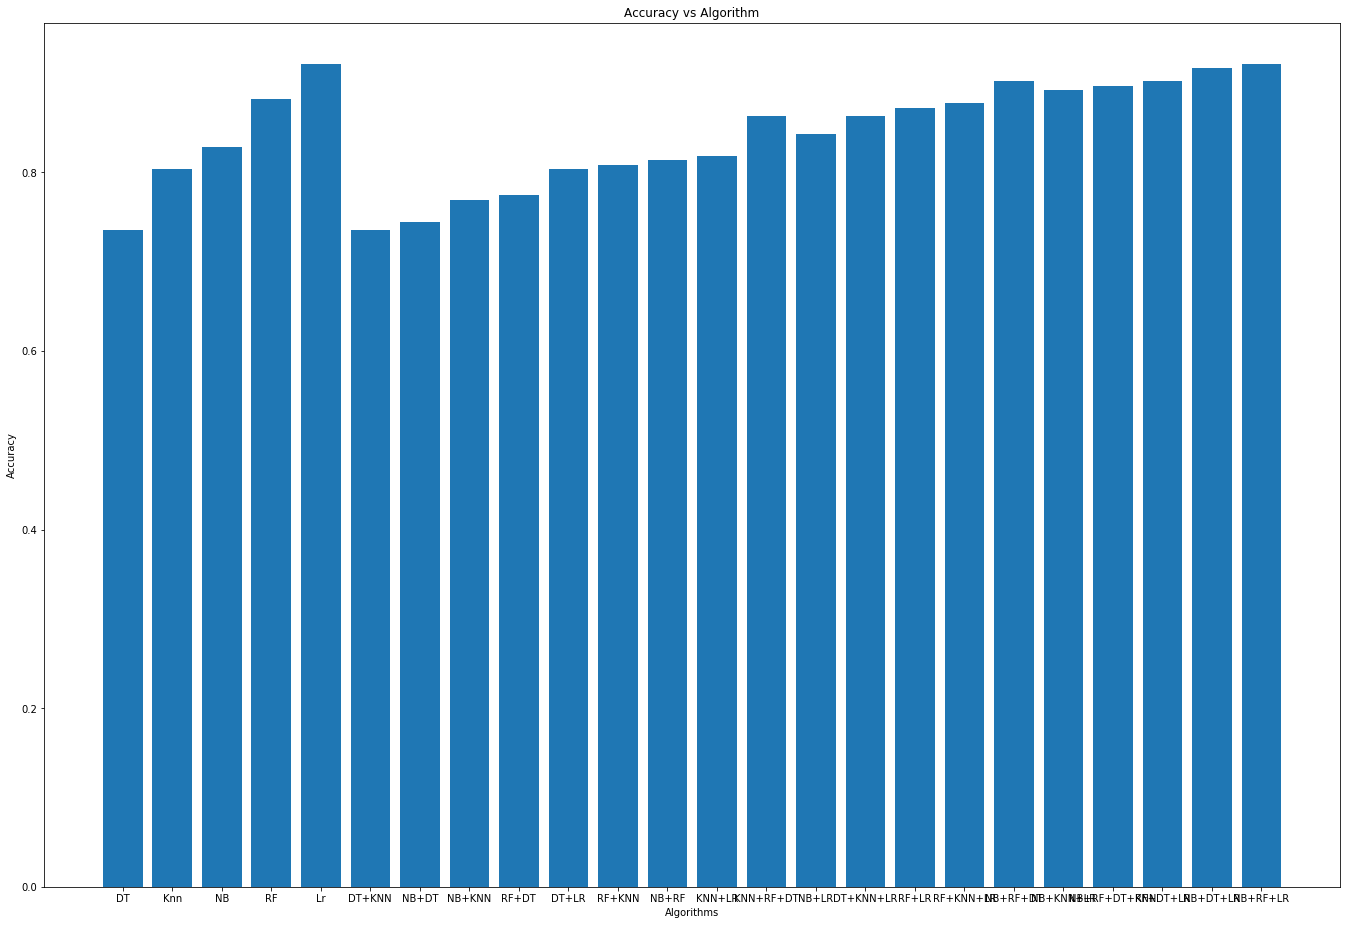

In [246]:
fig = plt.figure()
ax = fig.add_axes([6,6,3,3])
ax.bar(AlgorithmsList,AccuracyList)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Algorithm")
plt.show()

A bar plot depicting accuracies with all the algorithms and combination of algorithms tried out.